<center><span style="background-color: rgb(251, 160, 38); font-size: 32px;">  <b>NUCLIO DIGITAL SCHOOL -</b> MASTER EN DATA SCIENCE  </span></center>
    
<br>
    
<center><a href = https://nuclio.school/wp-content/uploads/2019/10/nucleoDS-newBlack.png > <img src="https://nuclio.school/wp-content/uploads/2019/10/nucleoDS-newBlack.png" width=400 height=100><a/></center>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<hr style="height:5px;border-width:0;color:orange;background-color:orange">
<center> <span style="font-size: 72px;"> PISA SPAIN 2018 </span> </center>

<span style="font-size: 16px;">


</span>

<br>

<hr style="height:5px;border-width:0;color:orange;background-color:orange">

# Librerias

In [ ]:
import pandas as pd
import numpy as np
import math

#Gráficos

import plotly.express as px
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import geopandas as gpd


#Procesado
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.decomposition import PCA

#Modelos

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

#Metricas
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

In [ ]:
spain_pisa = pd.read_csv('/content/drive/MyDrive/pisa_españa.csv', delimiter=',', encoding='latin1')

# Carga de Datos

In [ ]:
spain_pisa.head()

,CNTRYID,CNT,CNTSCHID,CNTSTUID,CYC,NatCen,STRATUM,SUBNATIO,OECD,ADMINMODE,...,PV3RTML,PV4RTML,PV5RTML,PV6RTML,PV7RTML,PV8RTML,PV9RTML,PV10RTML,SENWT,VER_DAT
0,724.0,ESP,72400001.0,72400490.0,07MS,72400,ESP9028,7240000,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.22135,26APR19:08:53:20
1,724.0,ESP,72400001.0,72401482.0,07MS,72400,ESP9028,7240000,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.21965,26APR19:08:53:20
2,724.0,ESP,72400001.0,72402362.0,07MS,72400,ESP9028,7240000,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.21965,26APR19:08:53:20
3,724.0,ESP,72400001.0,72402959.0,07MS,72400,ESP9028,7240000,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.22135,26APR19:08:53:20
4,724.0,ESP,72400001.0,72403316.0,07MS,72400,ESP9028,7240000,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.21965,26APR19:08:53:20


In [ ]:
spain_pisa.drop_duplicates(inplace = True)

In [ ]:
num_filas, num_columnas = spain_pisa.shape

print(f'Número de filas: {num_filas}')
print(f'Número de columnas: {num_columnas}')

Número de filas: 35943
Número de columnas: 1118


Nuestra base de datos consta de 1118 variables diferentes y 35943 filas que corresponden a los estudiantes encuestados.

El número de variables es considerablemente alto, pero para nuestro proyecto, no todas son necesarias. Por lo tanto, hemos optado por seleccionar únicamente aquellas que consideramos relevantes para nuestros propósitos.

In [ ]:
#Columnas que dejamos
dic_variables1 = {
    "STRATUM":   "PROVINCIA",
    "ST001D01T": "GRADO",
#Género
#{1.0: "Femenino", 2.0: "Masculino"}
    "ST004D01T": "GÉNERO",
    #Notas
    "PV1SCIE" : "Ciencias1",
    "PV2SCIE": "Ciencias2",
    "PV3SCIE": "Ciencias3",
    "PV4SCIE": "Ciencias4",
    "PV5SCIE": "Ciencias5",
    "PV6SCIE" : "Ciencias6",
    "PV7SCIE": "Ciencias7",
    "PV8SCIE": "Ciencias8",
    "PV9SCIE": "Ciencias9",
    "PV10SCIE": "Ciencias10",
    "PV1MATH": "Matematicas1",
    "PV2MATH": "Matematicas2",
    "PV3MATH": "Matematicas3",
    "PV4MATH": "Matematicas4",
    "PV5MATH": "Matematicas5",
    "PV6MATH": "Matematicas6",
    "PV7MATH": "Matematicas7",
    "PV8MATH": "Matematicas8",
    "PV9MATH": "Matematicas9",
    "PV10MATH": "Matematicas10"
}


### **Columnas a eliminar**

In [ ]:
#Diccionario que contiene los nombres de las columnas que necesitamos y como se llamarán posteriormente.

dic_variables = {
#VARIABLES CATEGÓRICAS NOMINAL (sin orden)
#¿Cuáles de las siguientes opciones se encuentran en tu hogar?
 #{1.0: "SI", 2.0: "NO"}
    "ST011Q01TA": "H: escritorio para estudiar",
    "ST011Q02TA": "H: habitación propia",
    "ST011Q03TA": "H: un lugar tranquilo para estudiar",
    "ST011Q04TA": "H: una computadora que puedas usar para t.e",
    "ST011Q05TA": "H: software educativo",
    "ST011Q06TA": "H: un enlace a Internet",
    "ST011Q07TA": "H: literatura clásica",
    "ST011Q08TA": "H: libros de poesía",
    "ST011Q09TA": "H: obras de arte",
    "ST011Q10TA": "H: libros para ayudarte en tus t.e",
    "ST011Q11TA": "H: libros de referencia técnica",

#¿En la escuela, alguna vez te han enseñado las siguientes cosas?
    "ST158Q01HA": "E: Usar palabras clave en buscadores Google/Yahoo",
    "ST158Q02HA": "E: Cómo decidir si confiar en la inf/Internet",
    "ST158Q03HA": "E: Comparar dif. pag/web y decidir inf. relevante en t.e",
    "ST158Q04HA": "E: Consecuencias hacer inf. pública en línea en Facebook/Instagram",
    "ST158Q05HA": "E: Uso descripción corta debajo de los enlaces de una búsqueda",
    "ST158Q06HA": "E: Detectar si la inf. es subjetiva o sesgada",
    "ST158Q07HA": "E: Detectar correos electrónicos de phishing o spam",
#Has realizado alguna de las siguientes actividades para obtener información sobre futuros estudios o tipos de trabajo
    "EC150Q07WA": "FE: Investigué Internet inf. sobre carreras",
    "EC150Q09WA": "FE: Investigué Internet sobre programas ISCED 3-5",

#"¿Cuál de las siguientes opciones esperas completar?"
#{1.0: "SI", 0.0: "NO"}
    "ST225Q01HA": "ISCED 2- Ed. primaria",
    "ST225Q02HA": "ISCED 3B o C - Ed. Secundaria Obligatoria(ESO)",
    "ST225Q03HA": "ISCED 3A - Ed. Secundaria Postobligatoria(Bachillerato)",
    "ST225Q04HA": "ISCED 4 - Ed. Terciaria no Universitaria(Formación Profesional)",
    "ST225Q05HA": "ISCED 5B - Enseñanza Superior (Grad. universitarios/equivalentes)",
    "ST225Q06HA": "ISCED 5A o 6 - Enseñanza Sup. Avanzada (Másteres/doctorados)",


#VARIABLES CATEGÓRICAS ORDINALES
#¿Cuántos de estos dispositivos tienes en tu hogar?
#{1.0: "Ninguno", 2.0: "Uno", 3.0: "Dos", 4.0: "Tres o más"}
    "ST012Q01TA": "H: Televisores",
    "ST012Q02TA": "H: Automóviles",
    "ST012Q03TA": "H: Habitaciones con baño o ducha",
    "ST012Q05NA": "H: Teléfonos celulares con acceso a Internet",
    "ST012Q06NA": "H: Computadoras",
    "ST012Q07NA": "H: Tabletas",
    "ST012Q08NA": "H: Lectores de libros electrónicos",
    "ST012Q09NA": "H: Instrumentos musicales",

#¿Has repetido algún <grado> alguna vez?
#{1.0: "No, nunca", 2.0: "Si, una vez", 3.0: "Si, dos o mas veces"}
    "ST127Q01TA": "REPETICIÓN CURSO ISCED1",
    "ST127Q02TA": "REPETICIÓN CURSO ISCED2",
    "ST127Q03TA": "REPETICIÓN CURSO ISCED3",


# Pensando en ti mismo y en cómo te sientes normalmente:
# ¿con qué frecuencia te sientes como se describe a continuación. Cómo te sientes normalmente:?
# {1: "Nunca", 2: "Rara vez", 3: "A veces", 4: "Siempre"}
    "ST186Q05HA": "Feliz",
    "ST186Q06HA": "Asustado",
    "ST186Q07HA": "Vivo",
    "ST186Q10HA": "Miserable",
    "ST186Q09HA": "Orgulloso",
    "ST186Q02HA": "Agobiado",
    "ST186Q01HA": "Jubiloso",
    "ST186Q08HA": "Triste",
    "ST186Q03HA": "Alegre",

#¿Hay alguno de estos dispositivos disponible para que los uses en tu hogar?
# {1: "Si, y lo uso", 2: "Si, pero no lo uso", 3: "No"}
    "IC001Q01TA": "H: Computadora de escritorio",
    "IC001Q02TA": "H: Portátil o notebook",
    "IC001Q03TA": "H: iPad, BlackBerry PlayBookTM",
    "IC001Q04TA": "H: Conexión a Internet",
    "IC001Q05TA": "H: PlayStation",
    "IC001Q08TA": "H: Reproductor música portátil Mp3/Mp4/iPod",
    "IC001Q09TA": "H: Impresora",
    "IC001Q10TA": "H: Memoria USB",
    "IC001Q11TA": "H: Amazon KindleTM",

#En una semana escolar típica, ¿cuánto tiempo pasas usando dispositivos digitales durante las clases en el aula?
# {1.0: "Sin tiempo", 2.0: "1-30 min por semana", 3: "31-60 min por semana", 4: "Mas de 60 min por semana", 5: "No estudio esta materia"}
    "IC150Q01HA": "E: uso d/digitales Lengua",
    "IC150Q02HA": "E: uso d/digitales Matemáticas",
    "IC150Q03HA": "E: uso d/digitales Ciencia",
    "IC150Q04HA": "E: uso d/digitales Idioma extranjero",
    "IC150Q05HA": "E: uso d/digitales Ciencias sociales",
    "IC150Q06HA": "E: uso d/digitales Música",
    "IC150Q07HA": "E: uso d/digitales Deportes",
    "IC150Q08HA": "E: uso d/digitales Artes escénicas",
    "IC150Q09HA": "E: uso d/digitales Artes visuales",

#"¿Con qué frecuencia utilizas dispositivos digitales para las siguientes actividades fuera de la escuela?"
# {1: "Nunca o casi nunca", 2: "1-2 veces por mes", 3: "1-2 veces por semana", 4: "Casi todos los días",  5: "Todos los días"}
    "IC008Q01TA": "FE: Jugar juegos de 1 solo jugador",
    "IC008Q02TA": "FE: Jugar juegos en línea colaborativos",
    "IC008Q03TA": "FE: Usar correo electrónico",
    "IC008Q04TA": "FE: Chatear en línea",
    "IC008Q05TA": "FE: Participar en redes sociales",
    "IC008Q07NA": "FE: Jugar juegos en línea en redes sociales",
    "IC008Q08TA": "FE: Navegar en Internet por diversión",
    "IC008Q09TA": "FE: Leer noticias en Internet",
    "IC008Q10TA": "FE: Obtener inf. práctica de Internet",
    "IC008Q11TA": "FE: Descargar música/películas, juegos/software de Internet",
    "IC008Q12TA": "FE: Subir contenido propio para compartir",
    "IC008Q13NA": "FE: Descargar nuevas aplicaciones en d/móvil",

 #"¿Con qué frecuencia utilizas dispositivos digitales para las siguientes actividades fuera de la escuela?"
    "IC010Q01TA": "FE: Navegar por Internet para t.e",
    "IC010Q02NA": "FE: Navegar por Internet para seguir lecciones/explicaciones",
    "IC010Q03TA": "FE: Correo electrónico con estudiantes sobre t.e",
    "IC010Q04TA": "FE: Correo electrónico con profesores y enviar t.e",
    "IC010Q05NA": "FE: Redes sociales con estudiantes sobre t.e",
    "IC010Q06NA": "FE: Redes sociales con profesores",
    "IC010Q07TA": "FE: Descargar/subir/navegar material desde sitio web escuela",
    "IC010Q08TA": "FE: Revisar el sitio web de escuela para anuncios",
    "IC010Q09NA": "FE: Hacer tareas en una computadora",
    "IC010Q10NA": "FE: Hacer tareas en un d/móvil",
    "IC010Q11HA": "FE: Aplicaciones/sitios web aprendizaje en computadora",
    "IC010Q12HA": "FE: Aplicaciones/sitios web aprendizaje en d/móvil",
}

Cada elemento en este diccionario contiene:

El índice, se refiere al código de la columna en la base de datos.

El texto representa la pregunta formulada a los estudiantes en la encuesta.

La eliminación de estas columnas se basa en los siguientes criterios:

1.   Se eliminaron las columnas relacionadas con el uso de Internet, redes sociales y otros dispositivos electrónicos.
2.   Eliminamos algunas de las variables relacionadas con objetos o configuraciones en el hogar.
3. Eliminamos algunas variables relacionadas con la percepción y los sentimientos de los estudiantes también han sido seleccionadas.

Se dejaron las variables:
1. Se han incluido las variables que describen la situación académica de los estudiantes, como el curso en el que se encuentran y si han repetido algún curso anteriormente.
2. Por último, se han incluido las notas en ciencias y matemáticas, ya que son el objetivo principal de nuestro trabajo.


Estas columnas han sido seleccionadas debido a su relevancia en relación con el uso de la tecnología, el entorno doméstico, la percepción personal, la situación académica y el rendimiento en ciencias y matemáticas de los estudiantes encuestados.

Nota importante: En nuestro análisis, nos enfocaremos exclusivamente en las calificaciones de Matemáticas y Ciencias, ya que la parte relacionada con Lectura ha sido desestimada debido a la obtención de valores extremadamente bajos. Para obtener información adicional al respecto, puedes consultar el siguiente enlace: : https://acortar.link/3Itq9c

In [ ]:
# Lista de columnas a eliminar
columnas_a_eliminar = list(dic_variables.keys())

# Eliminar las columnas del DataFrame
df = spain_pisa.drop(columns=columnas_a_eliminar)


In [ ]:
df.shape

(35943, 1030)

In [ ]:
df.head(3)

,CNTRYID,CNT,CNTSCHID,CNTSTUID,CYC,NatCen,STRATUM,SUBNATIO,OECD,ADMINMODE,...,PV3RTML,PV4RTML,PV5RTML,PV6RTML,PV7RTML,PV8RTML,PV9RTML,PV10RTML,SENWT,VER_DAT
0,724.0,ESP,72400001.0,72400490.0,07MS,72400,ESP9028,7240000,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.22135,26APR19:08:53:20
1,724.0,ESP,72400001.0,72401482.0,07MS,72400,ESP9028,7240000,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.21965,26APR19:08:53:20
2,724.0,ESP,72400001.0,72402362.0,07MS,72400,ESP9028,7240000,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.21965,26APR19:08:53:20


In [ ]:
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
print(df.head())  # Mostrar las primeras filas del DataFrame

   CNTRYID  CNT    CNTSCHID    CNTSTUID   CYC  NatCen  STRATUM  SUBNATIO  \
0    724.0  ESP  72400001.0  72400490.0  07MS   72400  ESP9028   7240000   
1    724.0  ESP  72400001.0  72401482.0  07MS   72400  ESP9028   7240000   
2    724.0  ESP  72400001.0  72402362.0  07MS   72400  ESP9028   7240000   
3    724.0  ESP  72400001.0  72402959.0  07MS   72400  ESP9028   7240000   
4    724.0  ESP  72400001.0  72403316.0  07MS   72400  ESP9028   7240000   

   OECD  ADMINMODE  LANGTEST_QQQ  LANGTEST_COG  LANGTEST_PAQ  BOOKID  \
0   1.0        2.0         156.0         156.0           NaN    37.0   
1   1.0        2.0         156.0         156.0           NaN    44.0   
2   1.0        2.0         156.0         156.0           NaN    13.0   
3   1.0        2.0         156.0         156.0           NaN    16.0   
4   1.0        2.0         156.0         156.0           NaN    43.0   

   ST001D01T  ST003D02T  ST003D03T  ST004D01T  ST005Q01TA  ST006Q01TA  \
0       10.0        9.0     2002.0   

In [ ]:
num_filas, num_columnas = df.shape

print(f'Número de filas: {num_filas} que corresponden a los registros por alumno.')
print(f'Número de columnas: {num_columnas} que son las variables con las que trabajaremos.')

Número de filas: 35943 que corresponden a los registros por alumno.
Número de columnas: 1030 que son las variables con las que trabajaremos.


In [ ]:
# diccionario de códigos a regiones
region_mapping = {
    'ESP0101': 'Andalucia',
    'ESP0102': 'Andalucia',
    'ESP9001': 'Andalucia',
    'ESP9002': 'Andalucia',
    'ESP0203': 'Aragon',
    'ESP0204': 'Aragon',
    'ESP9003': 'Aragon',
    'ESP9004': 'Aragon',
    'ESP0305': 'Asturias',
    'ESP0306': 'Asturias',
    'ESP9005': 'Asturias',
    'ESP9006': 'Asturias',
    'ESP0407': 'Islas Baleares',
    'ESP0408': 'Islas Baleares',
    'ESP9007': 'Islas Baleares',
    'ESP9008': 'Islas Baleares',
    'ESP0509': 'Islas Canarias',
    'ESP0510': 'Islas Canarias',
    'ESP9009': 'Islas Canarias',
    'ESP9010': 'Islas Canarias',
    'ESP0611': 'Cantabria',
    'ESP0612': 'Cantabria',
    'ESP9011': 'Cantabria',
    'ESP9012': 'Cantabria',
    'ESP0713': 'Castilla y Leon',
    'ESP0714': 'Castilla y Leon',
    'ESP9013': 'Castilla y Leon',
    'ESP9014': 'Castilla y Leon',
    'ESP0815': 'Castilla - La Mancha',
    'ESP0816': 'Castilla - La Mancha',
    'ESP9015': 'Castilla - La Mancha',
    'ESP9016': 'Castilla - La Mancha',
    'ESP0917': 'Cataluna',
    'ESP0918': 'Cataluna',
    'ESP9017': 'Cataluna',
    'ESP9018': 'Cataluna',
    'ESP1019': 'Extremadura',
    'ESP1020': 'Extremadura',
    'ESP9019': 'Extremadura',
    'ESP9020': 'Extremadura',
    'ESP1121': 'Galicia',
    'ESP1122': 'Galicia',
    'ESP9021': 'Galicia',
    'ESP9022': 'Galicia',
    'ESP1223': 'La Rioja',
    'ESP1224': 'La Rioja',
    'ESP9023': 'La Rioja',
    'ESP9024': 'La Rioja',
    'ESP1325': 'Madrid',
    'ESP1326': 'Madrid',
    'ESP9025': 'Madrid',
    'ESP9026': 'Madrid',
    'ESP1427': 'Murcia',
    'ESP1428': 'Murcia',
    'ESP9027': 'Murcia',
    'ESP9028': 'Murcia',
    'ESP1529': 'Navarra',
    'ESP1530': 'Navarra',
    'ESP9029': 'Navarra',
    'ESP9030': 'Navarra',
    'ESP1631': 'Pais Vasco',
    'ESP1632': 'Pais Vasco',
    'ESP1633': 'Pais Vasco',
    'ESP1634': 'Pais Vasco',
    'ESP1635': 'Pais Vasco',
    'ESP1636': 'Pais Vasco',
    'ESP9031': 'Pais Vasco',
    'ESP9032': 'Pais Vasco',
    'ESP9033': 'Pais Vasco',
    'ESP9034': 'Pais Vasco',
    'ESP9035': 'Pais Vasco',
    'ESP9036': 'Pais Vasco',
    'ESP1737': 'Comunidad Valenciana',
    'ESP1738': 'Comunidad Valenciana',
    'ESP9037': 'Comunidad Valenciana',
    'ESP9038': 'Comunidad Valenciana',
    'ESP9039': 'Ceuta y Melilla',
    'ESP9040': 'Ceuta y Melilla'
}


In [ ]:
# Cambiar el nombre de la columna 'STRATUM' a 'REGION' en la copia
df_copy = df.copy()
df_copy.rename(columns={'STRATUM': 'REGION'}, inplace=True)
df_copy.rename(columns={'ST004D01T': 'GENERO'}, inplace=True)
df_copy.rename(columns={'ST001D01T': 'GRADO'}, inplace=True)
df_copy['REGION'] = df_copy['REGION'].map(region_mapping)
df = df_copy.copy()

La columna "STRATUM" se relaciona con la provincia. Hemos realizado un mapeo de todos los códigos y sus respectivos valores según el Codebook para facilitar la posterior visualización.

### **VARIABLE TARGET**


La variable objetivo de nuestro proyecto será la siguiente: un valor booleano que señalará si el rendimiento del estudiante está por encima o por debajo del promedio de la OCDE.

El primer paso implica calcular el promedio de desempeño de cada estudiante tanto en matemáticas como en ciencias. En cada asignatura, se presentan 10 valores, que en parte hacen referencia a los valores plausibles (lo que significa que son resultados razonables) y posiblemente a las distintas secciones que componen cada uno de los exámenes.

In [ ]:
# variable NOTA CIENCIAS en el que vamos a sacar la media de CIENCIAS
df['NOTA CIENCIAS'] = df[['PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE', 'PV6SCIE', 'PV7SCIE', 'PV8SCIE', 'PV9SCIE', 'PV10SCIE']].mean(axis=1)
# hacemos lo mismo con MATEMATICAS
df['NOTA MATEMATICAS'] = df[['PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH', 'PV6MATH', 'PV7MATH', 'PV8MATH', 'PV9MATH', 'PV10MATH']].mean(axis=1)
# variable CALIFICACION contiene la media de NOTA CIENCIAS y NOTA MATEMATICAS
df['CALIFICACION'] = df[['NOTA CIENCIAS', 'NOTA MATEMATICAS']].mean(axis=1)
df['CALIFICACION'] = df['CALIFICACION'].round(2)
df['CALIFICACION']

0        466.27
1        535.94
2        622.63
3        416.71
4        501.80
          ...  
35938    497.29
35939    589.60
35940    531.32
35941    628.62
35942    582.28
Name: CALIFICACION, Length: 35943, dtype: float64

Calificacion contiene la media de las dos notas, matemáticas y ciencias.

De acuerdo con la OECD, el puntaje promedio en las pruebas de matemáticas y ciencias es de 489. Por lo tanto, utilizaremos este valor como referencia para crear nuestra variable TARGET.

Nuestro objetivo será una variable binaria que nos indicará si el estudiante se encuentra por debajo del promedio, representado con un 0, o si está por encima del promedio, representado con un 1.

In [ ]:
def target(x):
    if x >= 489:
        return 1
    else:
        return 0

In [ ]:
#Este es nuestro TARGET
df['TARGET'] = df['CALIFICACION'].apply(target)

In [ ]:
df['TARGET'].value_counts()

1    18994
0    16949
Name: TARGET, dtype: int64

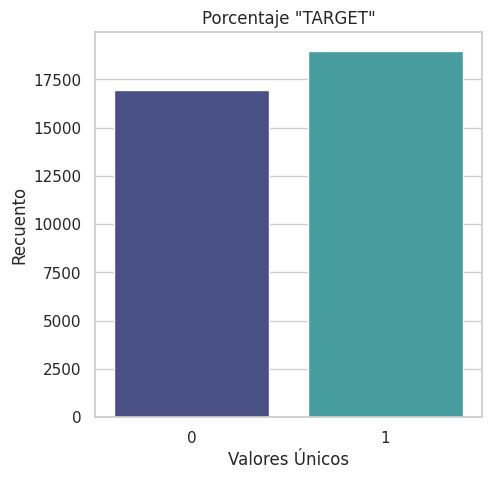

In [ ]:
sns.set(style="whitegrid")

conteo_valores = df['TARGET'].value_counts()

plt.figure(figsize=(5, 5))
sns.barplot(x=conteo_valores.index, y=conteo_valores.values, palette="mako")

plt.title('Porcentaje "TARGET"')
plt.xlabel('Valores Únicos')
plt.ylabel('Recuento')
plt.xticks()

plt.show()

Observamos que el target está muy equilibrado. Consideramos este hayazgo muy positivo por lo siguiente:

Menos sesgo en el futuro modelo: Los modelos de machine learning tienden a sesgarse hacia la clase dominante. Esto significa que el modelo puede ser más propenso a predecir la clase mayoritaria en lugar de aprender patrones útiles de ambas clases. Con un equilibrio cercano entre las clases, este sesgo se reduce y el modelo tiene la oportunidad de aprender de manera más equitativa.

Mejor Generalización: Un modelo entrenado en un conjunto de datos equilibrado generalmente tendrá una mejor capacidad de generalización. Esto significa que el modelo será más efectivo al hacer predicciones sobre nuevos datos, ya que no estará sesgado hacia una clase en particular.

Evaluación más precisa: Al tener un equilibrio entre las clases, las métricas de evaluación del modelo, como la precisión, la sensibilidad y la especificidad, serán más confiables.

### **ANALISIS EXPLORATORIO**

In [ ]:
num_filas, num_columnas = df.shape

print(f'Número de filas: {num_filas}')
print(f'Número de columnas: {num_columnas}')

Número de filas: 35943
Número de columnas: 1034


In [ ]:
df.drop_duplicates(inplace= True)

Eliminamos duplicados.

In [ ]:
df.dtypes

CNTRYID             float64
CNT                  object
CNTSCHID            float64
CNTSTUID            float64
CYC                  object
                     ...   
VER_DAT              object
NOTA CIENCIAS       float64
NOTA MATEMATICAS    float64
CALIFICACION        float64
TARGET                int64
Length: 1034, dtype: object

In [ ]:
columnas_object = df.select_dtypes(include=['object']).columns

# Esto te dará una lista de las columnas de tipo "object"
print(columnas_object)

Index(['CNT', 'CYC', 'REGION', 'VER_DAT'], dtype='object')


In [ ]:
#Elimino estas columnas object
columnas_a_eliminar = ['CNT', 'CYC', 'VER_DAT']
df = df.drop(columnas_a_eliminar, axis=1)


In [ ]:
# Contar columnas de tipo float
num_columnas_float = df.select_dtypes(include=['float64']).shape[1]

# Contar columnas de tipo integer (int64)
num_columnas_int = df.select_dtypes(include=['int64']).shape[1]

print(f'Número de columnas tipo float: {num_columnas_float}')
print(f'Número de columnas tipo integer (int64): {num_columnas_int}')


Número de columnas tipo float: 1017
Número de columnas tipo integer (int64): 13


In [ ]:
df.shape

(35943, 1031)

Hemos convertido todos los datos a float menos REGION

### **NULOS**

La siguiente gráfica nos mostrará de forma muy visual e intuitiva que cantidad de nulos hay por fila y columna.

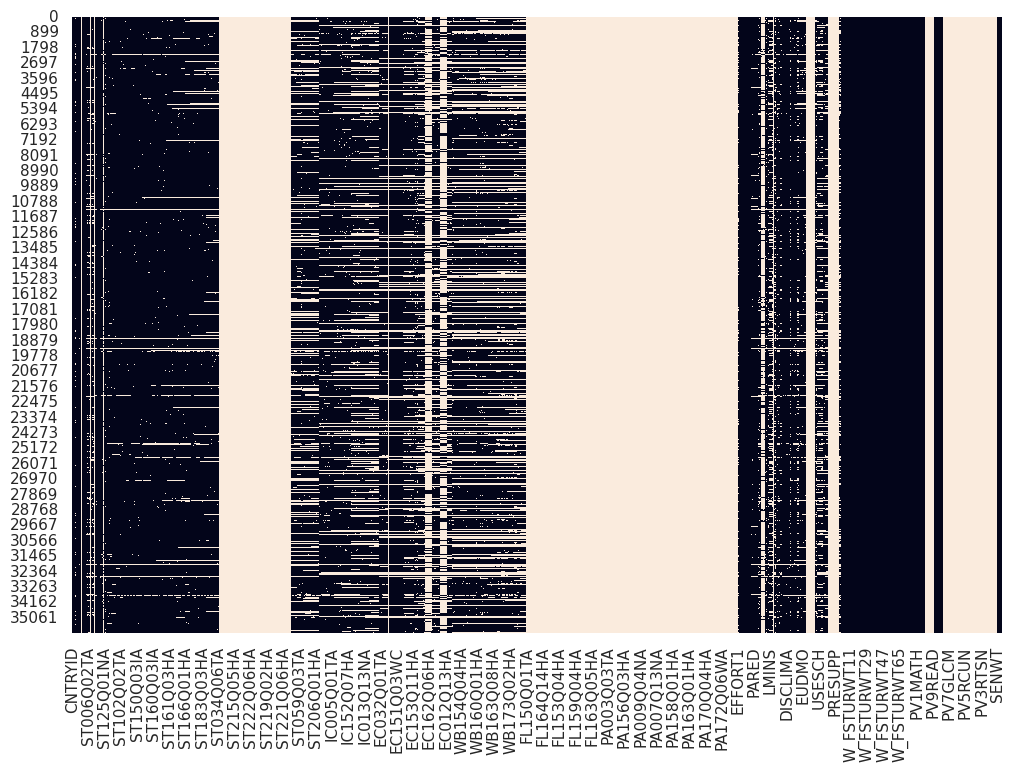

In [ ]:
#Creamos un heatmap de los nulos que contiene nuestro df

plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

Observaciones:
1. Hay columnas que carecen de datos en su totalidad.
2. Encontramos que algunas filas tienen una cantidad limitada o incluso carecen en gran medida de registros.
3. Se han identificado patrones notables en los datos; específicamente, las columnas relacionadas con las calificaciones no presentan ningún valor NaN. Esto sugiere la posibilidad de que todos los alumnos hayan completado el examen, pero no necesariamente participaron en la encuesta.

In [ ]:
# Columnas con todos los valores nulos
columnas_con_valores_nulos = df.columns[df.isnull().all()]
columnas_con_valores_nulos_lista = list(columnas_con_valores_nulos)
print("Columnas con todos los valores nulos:")
print(columnas_con_valores_nulos_lista)

Columnas con todos los valores nulos:
['LANGTEST_PAQ', 'ST006Q04TA', 'ST008Q04TA', 'ST196Q02HA', 'ST196Q03HA', 'ST196Q04HA', 'ST196Q05HA', 'ST196Q06HA', 'ST196Q07HA', 'ST197Q01HA', 'ST197Q02HA', 'ST197Q04HA', 'ST197Q07HA', 'ST197Q08HA', 'ST197Q09HA', 'ST197Q12HA', 'ST215Q01HA', 'ST215Q02HA', 'ST215Q03HA', 'ST215Q04HA', 'ST215Q05HA', 'ST216Q01HA', 'ST216Q02HA', 'ST216Q03HA', 'ST216Q04HA', 'ST216Q05HA', 'ST216Q06HA', 'ST218Q01HA', 'ST218Q02HA', 'ST218Q03HA', 'ST218Q04HA', 'ST218Q05HA', 'ST218Q06HA', 'ST218Q07HA', 'ST222Q01HA', 'ST222Q03HA', 'ST222Q04HA', 'ST222Q05HA', 'ST222Q06HA', 'ST222Q08HA', 'ST222Q09HA', 'ST222Q10HA', 'ST214Q01HA', 'ST214Q02HA', 'ST214Q03HA', 'ST214Q06HA', 'ST220Q01HA', 'ST220Q02HA', 'ST220Q03HA', 'ST220Q04HA', 'ST217Q01HA', 'ST217Q02HA', 'ST217Q03HA', 'ST217Q04HA', 'ST217Q05HA', 'ST219Q01HA', 'ST219Q02HA', 'ST219Q03HA', 'ST219Q04HA', 'ST219Q05HA', 'ST219Q06HA', 'ST204Q02HA', 'ST204Q03HA', 'ST204Q04HA', 'ST204Q05HA', 'ST177Q01HA', 'ST177Q02HA', 'ST177Q03HA', 'ST189Q

In [ ]:
#Eliminar columnas con todos los valores nulos
df = df.drop(columns=columnas_con_valores_nulos_lista)

In [ ]:
# Eliminar filas con todos los valores nulos
df = df.dropna(how='all')

In [ ]:
# Listado de columnas con al menos un valor nulo
columnas_con_valores_nulos = df.columns[df.isna().any()].tolist()

print("Columnas con al menos un valor nulo:")
print(columnas_con_valores_nulos)

Columnas con al menos un valor nulo:
['REGION', 'LANGTEST_QQQ', 'ST005Q01TA', 'ST006Q01TA', 'ST006Q02TA', 'ST006Q03TA', 'ST007Q01TA', 'ST008Q01TA', 'ST008Q02TA', 'ST008Q03TA', 'ST011Q12TA', 'ST011Q16NA', 'ST013Q01TA', 'ST019AQ01T', 'ST019BQ01T', 'ST019CQ01T', 'ST021Q01TA', 'ST125Q01NA', 'ST126Q01TA', 'ST022Q01TA', 'ST023Q01TA', 'ST023Q02TA', 'ST023Q03TA', 'ST023Q04TA', 'ST023Q05TA', 'ST097Q01TA', 'ST097Q02TA', 'ST097Q03TA', 'ST097Q04TA', 'ST097Q05TA', 'ST100Q01TA', 'ST100Q02TA', 'ST100Q03TA', 'ST100Q04TA', 'ST102Q01TA', 'ST102Q02TA', 'ST102Q03TA', 'ST102Q04TA', 'ST211Q01HA', 'ST211Q02HA', 'ST211Q03HA', 'ST212Q01HA', 'ST212Q02HA', 'ST212Q03HA', 'ST104Q02NA', 'ST104Q03NA', 'ST104Q04NA', 'ST213Q01HA', 'ST213Q02HA', 'ST213Q03HA', 'ST213Q04HA', 'ST150Q01IA', 'ST150Q02IA', 'ST150Q03IA', 'ST150Q04HA', 'ST152Q05IA', 'ST152Q06IA', 'ST152Q07IA', 'ST152Q08IA', 'ST154Q01HA', 'ST153Q01HA', 'ST153Q02HA', 'ST153Q03HA', 'ST153Q04HA', 'ST153Q05HA', 'ST153Q06HA', 'ST153Q08HA', 'ST153Q09HA', 'ST153Q10HA'

In [ ]:
# Porcentaje de nulos por columnas en orden descendente.
null_percentage_columns = (df.isnull().sum() / len(df)) * 100
print(null_percentage_columns.sort_values(ascending=False))

ST021Q01TA      90.248449
LANGSIBLINGS    87.655454
LANGFRIEND      86.656651
LANGSCHMATES    86.637176
EC162Q08HA      86.584314
                  ...    
W_FSTURWT10      0.000000
W_FSTURWT9       0.000000
W_FSTURWT8       0.000000
W_FSTURWT7       0.000000
TARGET           0.000000
Length: 619, dtype: float64


Después de eliminar aquellas columnas que estaban completamente vacías observamos que el porcentaje de valores faltantes en cada columna es relativamente bajo. Por lo tanto, más adelante procederemos a su imputación.

In [ ]:
# Porcentaje de nulos por filas en orden descendente.
null_percentage_rows = (df.isnull().sum(axis=1) / len(df.columns)) * 100

filtered_rows = null_percentage_rows[null_percentage_rows > 10]
print(filtered_rows.sort_values(ascending=False))

18337    77.867528
34665    77.867528
26144    77.867528
22597    77.867528
16724    77.867528
           ...    
14866    10.016155
5624     10.016155
16609    10.016155
22853    10.016155
19695    10.016155
Length: 15986, dtype: float64


En cuanto a las filas, hemos notado la presencia de filas con un alto porcentaje de valores faltantes. Hemos llegado a la conclusión de que los resultados de un alumno con más del 75% de información faltante pueden ser poco confiables y de esta forma lo eliminamos.

In [ ]:
#Eliminamos las filas que tengan más de un 70% de NaN
umbral = 0.75
max_nulos_permitidos = int(df.shape[1] * (1 - umbral))
df = df.dropna(thresh=max_nulos_permitidos)

In [ ]:
#Elimino las filas que tienen como valor "Desconocido" de la columna 'REGION'
df['REGION'].fillna('Desconocido', inplace=True) #los nulos de la columna REGION los nombramos Desconocido

# Eliminarmos filas con 'Desconocido' en la columna 'REGION'
df = df[df['REGION'] != 'Desconocido']

# Reseteamos el índice
df.reset_index(drop=True, inplace=True)

<ipython-input-36-776a20caf413>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['REGION'].fillna('Desconocido', inplace=True) #los nulos de la columna REGION los nombramos Desconocido


In [ ]:
# Obtén la lista de columnas
lista_de_columnas = df.columns.tolist()

# Imprime la lista de columnas
print(lista_de_columnas)

['CNTRYID', 'CNTSCHID', 'CNTSTUID', 'NatCen', 'REGION', 'SUBNATIO', 'OECD', 'ADMINMODE', 'LANGTEST_QQQ', 'LANGTEST_COG', 'BOOKID', 'GRADO', 'ST003D02T', 'ST003D03T', 'GENERO', 'ST005Q01TA', 'ST006Q01TA', 'ST006Q02TA', 'ST006Q03TA', 'ST007Q01TA', 'ST008Q01TA', 'ST008Q02TA', 'ST008Q03TA', 'ST011Q12TA', 'ST011Q16NA', 'ST011D17TA', 'ST011D18TA', 'ST011D19TA', 'ST013Q01TA', 'ST019AQ01T', 'ST019BQ01T', 'ST019CQ01T', 'ST021Q01TA', 'ST125Q01NA', 'ST126Q01TA', 'ST022Q01TA', 'ST023Q01TA', 'ST023Q02TA', 'ST023Q03TA', 'ST023Q04TA', 'ST023Q05TA', 'ST097Q01TA', 'ST097Q02TA', 'ST097Q03TA', 'ST097Q04TA', 'ST097Q05TA', 'ST100Q01TA', 'ST100Q02TA', 'ST100Q03TA', 'ST100Q04TA', 'ST102Q01TA', 'ST102Q02TA', 'ST102Q03TA', 'ST102Q04TA', 'ST211Q01HA', 'ST211Q02HA', 'ST211Q03HA', 'ST212Q01HA', 'ST212Q02HA', 'ST212Q03HA', 'ST104Q02NA', 'ST104Q03NA', 'ST104Q04NA', 'ST213Q01HA', 'ST213Q02HA', 'ST213Q03HA', 'ST213Q04HA', 'ST150Q01IA', 'ST150Q02IA', 'ST150Q03IA', 'ST150Q04HA', 'ST152Q05IA', 'ST152Q06IA', 'ST152Q07IA'

In [ ]:
df.iloc[:, :16]

,CNTRYID,CNTSCHID,CNTSTUID,NatCen,REGION,SUBNATIO,OECD,ADMINMODE,LANGTEST_QQQ,LANGTEST_COG,BOOKID,GRADO,ST003D02T,ST003D03T,GENERO,ST005Q01TA
0,724.0,72400001.0,72400490.0,72400,Murcia,7240000,1.0,2.0,156.0,156.0,37.0,10.0,9.0,2002.0,2.0,1.0
1,724.0,72400001.0,72401482.0,72400,Murcia,7240000,1.0,2.0,156.0,156.0,44.0,10.0,8.0,2002.0,1.0,1.0
2,724.0,72400001.0,72402362.0,72400,Murcia,7240000,1.0,2.0,156.0,156.0,13.0,10.0,11.0,2002.0,1.0,1.0
3,724.0,72400001.0,72402959.0,72400,Murcia,7240000,1.0,2.0,156.0,156.0,16.0,10.0,5.0,2002.0,2.0,3.0
4,724.0,72400001.0,72403316.0,72400,Murcia,7240000,1.0,2.0,156.0,156.0,43.0,10.0,2.0,2002.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31574,724.0,72401102.0,72421796.0,72400,Castilla y Leon,7240000,1.0,2.0,156.0,156.0,11.0,10.0,3.0,2002.0,1.0,1.0
31575,724.0,72401102.0,72425905.0,72400,Castilla y Leon,7240000,1.0,2.0,156.0,156.0,23.0,10.0,7.0,2002.0,1.0,1.0
31576,724.0,72401102.0,72426602.0,72400,Castilla y Leon,7240000,1.0,2.0,156.0,156.0,3.0,10.0,10.0,2002.0,1.0,2.0
31577,724.0,72401102.0,72444251.0,72400,Castilla y Leon,7240000,1.0,2.0,156.0,156.0,12.0,10.0,5.0,2002.0,2.0,1.0


In [ ]:
# Encuentra las columnas con un único valor
columns_with_unique_value = [col for col in df.columns if df[col].nunique() == 1]

# Imprime las columnas con un único valor
print("Columnas con un único valor:")
for col in columns_with_unique_value:
    print(col)

Columnas con un único valor:
CNTRYID
NatCen
SUBNATIO
OECD
ADMINMODE
ST003D03T


In [ ]:
# Eliminamos las columnas con valores unicos y otras
columnas_a_eliminar = [
    "CNTRYID", "NatCen", "SUBNATIO", "OECD", "ADMINMODE", "ST003D03T",
    "CNTSCHID",	"CNTSTUID", "LANGTEST_QQQ",	"LANGTEST_COG",	"BOOKID"]
df = df.drop(columns=columnas_a_eliminar)


In [ ]:
df.shape

(31579, 608)

In [ ]:
# Encuentra las columnas con solo 2 valores distintos
columnas_con_2_valores = [col for col in df.columns if df[col].nunique() == 2]

# Imprime las columnas encontradas
print("Columnas con solo 2 valores distintos:")
for col in columnas_con_2_valores:
    print(col)


Columnas con solo 2 valores distintos:
GENERO
ST006Q01TA
ST006Q02TA
ST006Q03TA
ST008Q01TA
ST008Q02TA
ST008Q03TA
ST011Q12TA
ST011Q16NA
ST019AQ01T
ST019BQ01T
ST019CQ01T
ST022Q01TA
ST153Q01HA
ST153Q02HA
ST153Q03HA
ST153Q04HA
ST153Q05HA
ST153Q06HA
ST153Q08HA
ST153Q09HA
ST153Q10HA
EC150Q01WA
EC150Q02WA
EC150Q03WA
EC150Q04WA
EC150Q05WA
EC150Q06WA
EC150Q08WA
EC151Q01WA
EC151Q01WB
EC151Q01WC
EC151Q02WA
EC151Q02WB
EC151Q02WC
EC151Q03WA
EC151Q03WB
EC151Q03WC
EC151Q04WA
EC151Q04WB
EC151Q04WC
EC151Q05WA
EC151Q05WB
EC151Q05WC
EC160Q01HA
EC163Q01HA
EC163Q02HA
EC163Q03HA
EC163Q04HA
EC163Q05HA
EC163Q06HA
EC163Q07HA
EC162Q01HA
EC162Q02HA
EC162Q03HA
EC162Q04HA
EC162Q05HA
EC162Q06HA
EC162Q07HA
EC162Q08HA
EC154Q01IA
EC154Q02IA
EC154Q03IA
EC154Q04HA
EC154Q05IA
EC154Q06IA
EC154Q07IA
EC154Q08HA
EC154Q09IA
EC012Q01NA
EC012Q02NA
EC012Q04NA
EC012Q06NA
EC012Q07NA
EC012Q08NA
EC012Q13HA
EC012Q12NA
WB178Q01HA
WB178Q02HA
WB178Q03HA
WB178Q04HA
WB178Q05HA
WB178Q06HA
WB178Q07HA
ISCEDL
ISCEDD
ISCEDO
REPEAT
TARGET


In [ ]:
display(df[columnas_con_2_valores])

,GENERO,ST006Q01TA,ST006Q02TA,ST006Q03TA,ST008Q01TA,ST008Q02TA,ST008Q03TA,ST011Q12TA,ST011Q16NA,ST019AQ01T,ST019BQ01T,ST019CQ01T,ST022Q01TA,ST153Q01HA,ST153Q02HA,ST153Q03HA,ST153Q04HA,ST153Q05HA,ST153Q06HA,ST153Q08HA,ST153Q09HA,ST153Q10HA,EC150Q01WA,EC150Q02WA,EC150Q03WA,EC150Q04WA,EC150Q05WA,EC150Q06WA,EC150Q08WA,EC151Q01WA,EC151Q01WB,EC151Q01WC,EC151Q02WA,EC151Q02WB,EC151Q02WC,EC151Q03WA,EC151Q03WB,EC151Q03WC,EC151Q04WA,EC151Q04WB,EC151Q04WC,EC151Q05WA,EC151Q05WB,EC151Q05WC,EC160Q01HA,EC163Q01HA,EC163Q02HA,EC163Q03HA,EC163Q04HA,EC163Q05HA,EC163Q06HA,EC163Q07HA,EC162Q01HA,EC162Q02HA,EC162Q03HA,EC162Q04HA,EC162Q05HA,EC162Q06HA,EC162Q07HA,EC162Q08HA,EC154Q01IA,EC154Q02IA,EC154Q03IA,EC154Q04HA,EC154Q05IA,EC154Q06IA,EC154Q07IA,EC154Q08HA,EC154Q09IA,EC012Q01NA,EC012Q02NA,EC012Q04NA,EC012Q06NA,EC012Q07NA,EC012Q08NA,EC012Q13HA,EC012Q12NA,WB178Q01HA,WB178Q02HA,WB178Q03HA,WB178Q04HA,WB178Q05HA,WB178Q06HA,WB178Q07HA,ISCEDL,ISCEDD,ISCEDO,REPEAT,TARGET
0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,0.0,0
1,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,0.0,1
2,1.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,0.0,1
3,2.0,NaN,1.0,NaN,NaN,1.0,NaN,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,0.0,0
4,1.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,2.0,2.0,2.0,2.0,2.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31574,1.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,NaN,2.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.0,1.0,1.0,2.0,1.0,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,0.0,1
31575,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,0.0,1
31576,1.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [ ]:
# Encuentra las columnas con solo 2 valores distintos
columnas_con_3_valores = [col for col in df.columns if df[col].nunique() == 3]

# Imprime las columnas encontradas
print("Columnas con solo 3 valores distintos:")
for col in columnas_con_3_valores:
    print(col)

Columnas con solo 3 valores distintos:
ST011D17TA
ST011D18TA
ST011D19TA
IC001Q06TA
IC001Q07TA
IC009Q01TA
IC009Q02TA
IC009Q03TA
IC009Q05NA
IC009Q06NA
IC009Q07NA
IC009Q08TA
IC009Q09TA
IC009Q10NA
IC009Q11NA
EC031Q01TA
EC032Q01TA
EC033Q01NA
WB160Q01HA
WB163Q01HA
WB163Q02HA
WB163Q03HA
WB163Q04HA
WB163Q05HA
WB163Q06HA
WB163Q07HA
WB163Q08HA
PROGN
LANGMOTHER
LANGFATHER
LANGSIBLINGS
LANGFRIEND
LANGSCHMATES
IMMIG
SCCHANGE
UNIT


In [ ]:
display(df[columnas_con_3_valores])

,ST011D17TA,ST011D18TA,ST011D19TA,IC001Q06TA,IC001Q07TA,IC009Q01TA,IC009Q02TA,IC009Q03TA,IC009Q05NA,IC009Q06NA,IC009Q07NA,IC009Q08TA,IC009Q09TA,IC009Q10NA,IC009Q11NA,EC031Q01TA,EC032Q01TA,EC033Q01NA,WB160Q01HA,WB163Q01HA,WB163Q02HA,WB163Q03HA,WB163Q04HA,WB163Q05HA,WB163Q06HA,WB163Q07HA,WB163Q08HA,PROGN,LANGMOTHER,LANGFATHER,LANGSIBLINGS,LANGFRIEND,LANGSCHMATES,IMMIG,SCCHANGE,UNIT
0,724002,724001,724001,3.0,1.0,3.0,1.0,1.0,3.0,1.0,1.0,3.0,3.0,3.0,3.0,1.0,3.0,1.0,2.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,3.0,7240001,NaN,NaN,NaN,NaN,NaN,3.0,2.0,2.0
1,724001,724001,724001,3.0,1.0,2.0,3.0,3.0,1.0,3.0,1.0,2.0,3.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,2.0,7240001,NaN,NaN,NaN,NaN,NaN,1.0,0.0,2.0
2,724001,724001,724001,3.0,1.0,3.0,3.0,3.0,1.0,1.0,3.0,3.0,3.0,1.0,3.0,1.0,1.0,1.0,2.0,2.0,3.0,3.0,2.0,3.0,1.0,1.0,2.0,7240001,NaN,NaN,NaN,NaN,NaN,1.0,0.0,2.0
3,724001,724001,724001,3.0,1.0,1.0,3.0,3.0,1.0,3.0,3.0,3.0,3.0,1.0,3.0,1.0,2.0,1.0,3.0,2.0,2.0,2.0,1.0,2.0,3.0,2.0,2.0,7240001,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0
4,724001,724001,724001,1.0,1.0,1.0,3.0,3.0,1.0,1.0,2.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,1.0,3.0,7240001,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31574,724001,724001,724001,2.0,1.0,1.0,2.0,1.0,1.0,3.0,3.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7240001,NaN,NaN,NaN,NaN,NaN,1.0,0.0,2.0
31575,724001,724001,724002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7240001,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0
31576,724002,724001,724001,2.0,1.0,1.0,1.0,2.0,1.0,1.0,3.0,3.0,3.0,1.0,3.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7240001,NaN,NaN,NaN,NaN,NaN,1.0,0.0,2.0
31577,724002,724002,724001,3.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,2.0,3.0,3.0,3.0,2.0,1.0,3.0,7240001,NaN,NaN,NaN,NaN,NaN,1.0,0.0,2.0


In [ ]:
columnas_a_eliminar = [
    'PROGN', 'LANGMOTHER', 'LANGFATHER', 'LANGSIBLINGS', 'LANGFRIEND', 'LANGSCHMATES',
    'ISCEDL', 'ISCEDD', 'ISCEDO',	'REPEAT'
    ]
df = df.drop(columns=columnas_a_eliminar)


In [ ]:
# Encuentra las columnas con solo 4 valores distintos
columnas_con_4_valores = [col for col in df.columns if df[col].nunique() == 4]

# Imprime las columnas encontradas
print("Columnas con solo 4 valores distintos:")
for col in columnas_con_4_valores:
    print(col)

Columnas con solo 4 valores distintos:
ST023Q01TA
ST023Q02TA
ST023Q03TA
ST023Q04TA
ST023Q05TA
ST097Q01TA
ST097Q02TA
ST097Q03TA
ST097Q04TA
ST097Q05TA
ST100Q01TA
ST100Q02TA
ST100Q03TA
ST100Q04TA
ST102Q01TA
ST102Q02TA
ST102Q03TA
ST102Q04TA
ST211Q01HA
ST211Q02HA
ST211Q03HA
ST212Q01HA
ST212Q02HA
ST212Q03HA
ST104Q02NA
ST104Q03NA
ST104Q04NA
ST213Q01HA
ST213Q02HA
ST213Q03HA
ST213Q04HA
ST150Q01IA
ST150Q02IA
ST150Q03IA
ST150Q04HA
ST152Q05IA
ST152Q06IA
ST152Q07IA
ST152Q08IA
ST160Q01IA
ST160Q02IA
ST160Q03IA
ST160Q04IA
ST160Q05IA
ST168Q01HA
ST161Q01HA
ST161Q02HA
ST161Q03HA
ST161Q06HA
ST161Q07HA
ST161Q08HA
ST163Q02HA
ST163Q03HA
ST163Q04HA
ST036Q05TA
ST036Q06TA
ST036Q08TA
ST181Q02HA
ST181Q03HA
ST181Q04HA
ST182Q03HA
ST182Q04HA
ST182Q05HA
ST182Q06HA
ST183Q01HA
ST183Q02HA
ST183Q03HA
ST184Q01HA
ST185Q01HA
ST185Q02HA
ST185Q03HA
ST188Q01HA
ST188Q02HA
ST188Q03HA
ST188Q06HA
ST188Q07HA
ST034Q01TA
ST034Q02TA
ST034Q03TA
ST034Q04TA
ST034Q05TA
ST034Q06TA
ST123Q02NA
ST123Q03NA
ST123Q04NA
ST205Q01HA
ST205Q02HA
ST20

In [ ]:
display(df[columnas_con_4_valores])

,ST023Q01TA,ST023Q02TA,ST023Q03TA,ST023Q04TA,ST023Q05TA,ST097Q01TA,ST097Q02TA,ST097Q03TA,ST097Q04TA,ST097Q05TA,ST100Q01TA,ST100Q02TA,ST100Q03TA,ST100Q04TA,ST102Q01TA,ST102Q02TA,ST102Q03TA,ST102Q04TA,ST211Q01HA,ST211Q02HA,ST211Q03HA,ST212Q01HA,ST212Q02HA,ST212Q03HA,ST104Q02NA,ST104Q03NA,ST104Q04NA,ST213Q01HA,ST213Q02HA,ST213Q03HA,ST213Q04HA,ST150Q01IA,ST150Q02IA,ST150Q03IA,ST150Q04HA,ST152Q05IA,ST152Q06IA,ST152Q07IA,ST152Q08IA,ST160Q01IA,ST160Q02IA,ST160Q03IA,ST160Q04IA,ST160Q05IA,ST168Q01HA,ST161Q01HA,ST161Q02HA,ST161Q03HA,ST161Q06HA,ST161Q07HA,ST161Q08HA,ST163Q02HA,ST163Q03HA,ST163Q04HA,ST036Q05TA,ST036Q06TA,ST036Q08TA,ST181Q02HA,ST181Q03HA,ST181Q04HA,ST182Q03HA,ST182Q04HA,ST182Q05HA,ST182Q06HA,ST183Q01HA,ST183Q02HA,ST183Q03HA,ST184Q01HA,ST185Q01HA,ST185Q02HA,ST185Q03HA,ST188Q01HA,ST188Q02HA,ST188Q03HA,ST188Q06HA,ST188Q07HA,ST034Q01TA,ST034Q02TA,ST034Q03TA,ST034Q04TA,ST034Q05TA,ST034Q06TA,ST123Q02NA,ST123Q03NA,ST123Q04NA,ST205Q01HA,ST205Q02HA,ST205Q03HA,ST205Q04HA,ST062Q01TA,ST062Q02TA,ST062Q03TA,ST038Q03NA,ST038Q04NA,ST038Q05NA,ST038Q06NA,ST038Q07NA,ST038Q08NA,ST207Q01HA,ST207Q02HA,ST207Q03HA,ST207Q04HA,ST207Q05HA,ST206Q01HA,ST206Q02HA,ST206Q03HA,ST206Q04HA,IC013Q01NA,IC013Q04NA,IC013Q05NA,IC013Q11NA,IC013Q12NA,IC013Q13NA,IC014Q03NA,IC014Q04NA,IC014Q06NA,IC014Q08NA,IC014Q09NA,IC015Q02NA,IC015Q03NA,IC015Q05NA,IC015Q07NA,IC015Q09NA,IC016Q01NA,IC016Q02NA,IC016Q04NA,IC016Q05NA,IC016Q07NA,EC153Q01HA,EC153Q02HA,EC153Q03HA,EC153Q04HA,EC153Q05HA,EC153Q06HA,EC153Q07HA,EC153Q08HA,EC153Q09HA,EC153Q10HA,EC153Q11HA,WB150Q01HA,WB155Q01HA,WB155Q02HA,WB155Q03HA,WB155Q04HA,WB155Q05HA,WB155Q06HA,WB155Q07HA,WB155Q08HA,WB155Q09HA,WB155Q10HA,WB161Q01HA,WB164Q01HA,WB165Q01HA,WB166Q01HA,WB166Q02HA,WB166Q03HA,WB166Q04HA,WB167Q01HA,WB168Q01HA,WB168Q02HA,WB168Q03HA,WB168Q04HA,WB171Q01HA,WB171Q02HA,WB171Q03HA,WB171Q04HA,WB173Q01HA,WB173Q02HA,WB173Q03HA,WB173Q04HA,WB177Q01HA,WB177Q02HA,WB177Q03HA,WB177Q04HA
0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,3.0,4.0,3.0,4.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,4.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,3.0,3.0,2.0,2.0,2.0,3.0,3.0,2.0,2.0,3.0,2.0,2.0,2.0,3.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0,3.0,3.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,2.0,3.0,4.0,3.0,2.0,3.0,3.0,2.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,2.0,3.0,3.0,1.0,2.0,2.0,1.0,3.0,3.0,2.0,2.0,1.0,2.0,3.0,2.0,4.0,2.0,2.0,2.0,3.0
1,4.0,4.0,4.0,4.0,4.0,4.0,3.0,2.0,4.0,3.0,3.0,3.0,2.0,4.0,2.0,3.0,2.0,3.0,3.0,1.0,2.0,3.0,1.0,3.0,1.0,3.0,1.0,1.0,1.0,2.0,2.0,3.0,3.0,2.0,4.0,1.0,1.0,1.0,1.0,3.0,1.0,2.0,3.0,3.0,1.0,1.0,2.0,2.0,3.0,3.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,3.0,2.0,3.0,4.0,4.0,4.0,3.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,4.0,2.0,2.0,4.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,4.0,4.0,4.0,2.0,2.0,3.0,3.0,3.0,3.0,2.0,3.0,4.0,2.0,4.0,3.0,4.0,3.0,2.0,2.0,3.0,2.0,1.0,3.0,2.0,1.0,1.0,2.0,1.0,4.0,1.0,1.0,1.0,3.0,1.0,1.0,2.0,1.0,3.0,1.0,3.0,2.0,2.0,1.0,2.0
2,4.0,4.0,4.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,4.0,4.0,3.0,3.0,4.0,4.0,2.0,2.0,2.0,3.0,1.0,3.0,2.0,4.0,4.0,4.0,3.0,2.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0,3.0,1.0,2.0,2.0,2.0,1.0,3.0,3.0,3.0,3.0,2.0,1.0,1.0,1.0,4.0,2.0,3.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,4.0,4.0,1.0,4.0,2.0,3.0,4.0,4.0,4.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,4.0,3.0,3.0,2.0,3.0,2.0,2.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,2.0,3.0,4.0,4.0,4.0,2.0,3.0,4.0,3.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,4.0,3.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,3.0,2.0,3.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,2.0,1.0,1.0,1.0,3.0,3.0,1.0,3.0,2.0,2.0,1.0,3.0,1.0,3.0,2.0,2.0,3.0,4.0,2.0,2.0,2.0

In [ ]:
# Encuentra las columnas con solo 5 valores distintos
columnas_con_5_valores = [col for col in df.columns if df[col].nunique() == 5]

# Imprime las columnas encontradas
print("Columnas con solo 5 valores distintos:")
for col in columnas_con_5_valores:
    print(col)

Columnas con solo 5 valores distintos:
GRADO
ST005Q01TA
ST007Q01TA
ST167Q01IA
ST167Q02IA
ST167Q03IA
ST167Q04IA
ST167Q05IA
ST175Q01IA
ST176Q01IA
ST176Q02IA
ST176Q03IA
ST176Q05IA
ST176Q06IA
ST176Q07IA
ST208Q01HA
ST208Q02HA
ST208Q04HA
IC151Q01HA
IC151Q02HA
IC151Q03HA
IC151Q04HA
IC151Q05HA
IC151Q06HA
IC151Q07HA
IC151Q08HA
IC151Q09HA
IC152Q01HA
IC152Q02HA
IC152Q03HA
IC152Q04HA
IC152Q05HA
IC152Q06HA
IC152Q07HA
IC152Q08HA
IC152Q09HA
IC011Q01TA
IC011Q02TA
IC011Q03TA
IC011Q04TA
IC011Q05TA
IC011Q06TA
IC011Q07TA
IC011Q08TA
IC011Q09TA
IC011Q10HA
IC169Q01HA
EC155Q01DA
EC155Q02DA
EC155Q03DA
EC155Q04HA
EC155Q05HA
WB153Q01HA
WB153Q02HA
WB153Q03HA
WB153Q04HA
WB153Q05HA
WB154Q01HA
WB154Q02HA
WB154Q03HA
WB154Q04HA
WB154Q05HA
WB154Q06HA
WB154Q07HA
WB154Q08HA
WB154Q09HA
WB162Q01HA
WB162Q02HA
WB162Q03HA
WB162Q04HA
WB162Q05HA
WB162Q06HA
WB162Q07HA
WB162Q08HA
WB162Q09HA
WB172Q01HA
WB176Q01HA
GRADE


In [ ]:
display(df[columnas_con_5_valores])

,GRADO,ST005Q01TA,ST007Q01TA,ST167Q01IA,ST167Q02IA,ST167Q03IA,ST167Q04IA,ST167Q05IA,ST175Q01IA,ST176Q01IA,ST176Q02IA,ST176Q03IA,ST176Q05IA,ST176Q06IA,ST176Q07IA,ST208Q01HA,ST208Q02HA,ST208Q04HA,IC151Q01HA,IC151Q02HA,IC151Q03HA,IC151Q04HA,IC151Q05HA,IC151Q06HA,IC151Q07HA,IC151Q08HA,IC151Q09HA,IC152Q01HA,IC152Q02HA,IC152Q03HA,IC152Q04HA,IC152Q05HA,IC152Q06HA,IC152Q07HA,IC152Q08HA,IC152Q09HA,IC011Q01TA,IC011Q02TA,IC011Q03TA,IC011Q04TA,IC011Q05TA,IC011Q06TA,IC011Q07TA,IC011Q08TA,IC011Q09TA,IC011Q10HA,IC169Q01HA,EC155Q01DA,EC155Q02DA,EC155Q03DA,EC155Q04HA,EC155Q05HA,WB153Q01HA,WB153Q02HA,WB153Q03HA,WB153Q04HA,WB153Q05HA,WB154Q01HA,WB154Q02HA,WB154Q03HA,WB154Q04HA,WB154Q05HA,WB154Q06HA,WB154Q07HA,WB154Q08HA,WB154Q09HA,WB162Q01HA,WB162Q02HA,WB162Q03HA,WB162Q04HA,WB162Q05HA,WB162Q06HA,WB162Q07HA,WB162Q08HA,WB162Q09HA,WB172Q01HA,WB176Q01HA,GRADE
0,10.0,1.0,1.0,4.0,3.0,2.0,2.0,3.0,2.0,5.0,5.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,2.0,3.0,2.0,1.0,1.0,1.0,1.0,4.0,4.0,3.0,3.0,NaN,5.0,4.0,5.0,5.0,1.0,1.0,4.0,4.0,1.0,1.0,2.0,2.0,1.0,2.0,NaN,4.0,3.0,2.0,1.0,2.0,3.0,3.0,2.0,3.0,2.0,2.0,3.0,3.0,3.0,3.0,4.0,5.0,5.0,5.0,3.0,5.0,3.0,5.0,3.0,5.0,3.0,1.0,2.0,4.0,3.0,0.0
1,10.0,1.0,4.0,3.0,1.0,1.0,5.0,2.0,1.0,3.0,5.0,4.0,3.0,5.0,5.0,4.0,3.0,5.0,1.0,1.0,2.0,1.0,1.0,5.0,1.0,5.0,5.0,3.0,4.0,3.0,3.0,3.0,5.0,4.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,3.0,3.0,2.0,3.0,3.0,5.0,2.0,5.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,3.0,3.0,4.0,1.0,4.0,1.0,1.0,4.0,3.0,0.0
2,10.0,1.0,2.0,2.0,1.0,3.0,1.0,2.0,1.0,3.0,4.0,4.0,3.0,2.0,3.0,5.0,5.0,5.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,5.0,4.0,4.0,3.0,3.0,3.0,5.0,4.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,5.0,3.0,3.0,4.0,2.0,2.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,2.0,4.0,2.0,0.0
3,10.0,3.0,1.0,1.0,2.0,1.0,1.0,5.0,1.0,2.0,5.0,5.0,5.0,1.0,5.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0,2.0,1.0,5.0,3.0,4.0,3.0,4.0,4.0,3.0,1.0,3.0,2.0,4.0,3.0,1.0,2.0,1.0,3.0,5.0,3.0,5.0,5.0,3.0,4.0,2.0,3.0,2.0,3.0,0.0
4,10.0,1.0,1.0,5.0,1.0,3.0,2.0,4.0,3.0,2.0,5.0,4.0,3.0,2.0,NaN,2.0,2.0,3.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,3.0,4.0,5.0,3.0,3.0,3.0,3.0,5.0,3.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,3.0,2.0,3.0,3.0,3.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,3.0,5.0,4.0,5.0,3.0,5.0,4.0,2.0,3.0,2.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31574,10.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,1.0,4.0,5.0,4.0,4.0,5.0,4.0,3.0,4.0,5.0,1.0,1.0,3.0,4.0,4.0,1.0,5.0,5.0,5.0,5.0,5.0,1.0,4.0,4.0,3.0,4.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
31575,10.0,1.0,1.0,2.0,1.0,3.0,1.0,2.0,3.0,2.0,5.0,4.0,3.0,2.0,3.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
31576,10.0,2.0,1.0,2.0,1.0,2.0,2.0,3.0,2.0,3.0,5.0,4.0,2.0,2.0,3.0,4.0,3.0,4.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,5.0,5.0,1.0,4.0,4.0,3.0,4.0,3.0,4.0,5.0,5.0,1.0,3.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
31577,10.0,1.0,3.0,1.0,1.0,1.0,1.0,3.0,1.0,3.0,5.0,3.0,2.0,2.0,3.0,3.0,4.0,4.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,5.0,5.0,3.0,4.0,3.0,3.0,4.0,3.0,4.0,5.0,5.0,1.0,3.0,2.0,1.0,1.0,1.0,2.0,3.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,5.0,2.0,5.0,2.0,5.0,3.0,2.0,

In [ ]:
# Encuentra las columnas con entre 6 y 10 valores distintos
columnas_con_entre_6_y_10_valores = [col for col in df.columns if 6 <= df[col].nunique() <= 10]

# Imprime las columnas encontradas
print("Columnas con entre 6 y 10 valores distintos:")
for col in columnas_con_entre_6_y_10_valores:
    print(col)

Columnas con entre 6 y 10 valores distintos:
ST013Q01TA
ST125Q01NA
ST126Q01TA
ST154Q01HA
ST164Q01IA
ST164Q02IA
ST164Q03IA
ST164Q04IA
ST164Q05IA
ST164Q06IA
ST165Q01IA
ST165Q02IA
ST165Q03IA
ST165Q04IA
ST165Q05IA
ST166Q01HA
ST166Q02HA
ST166Q03HA
ST166Q04HA
ST166Q05HA
IC002Q01HA
IC004Q01HA
IC005Q01TA
IC006Q01TA
IC007Q01TA
EC152Q01HA
WB158Q01HA
WB032Q01NA
WB032Q02NA
WB031Q01NA
EFFORT1
EFFORT2
LANGN
MISCED
FISCED
HISCED
PARED
MISCED_D
FISCED_D
HISCED_D
PAREDINT
DURECEC
CHANGE
UNDREM
METASUM
METASPAM


In [ ]:
display(df[columnas_con_entre_6_y_10_valores])


,ST013Q01TA,ST125Q01NA,ST126Q01TA,ST154Q01HA,ST164Q01IA,ST164Q02IA,ST164Q03IA,ST164Q04IA,ST164Q05IA,ST164Q06IA,ST165Q01IA,ST165Q02IA,ST165Q03IA,ST165Q04IA,ST165Q05IA,ST166Q01HA,ST166Q02HA,ST166Q03HA,ST166Q04HA,ST166Q05HA,IC002Q01HA,IC004Q01HA,IC005Q01TA,IC006Q01TA,IC007Q01TA,EC152Q01HA,WB158Q01HA,WB032Q01NA,WB032Q02NA,WB031Q01NA,EFFORT1,EFFORT2,LANGN,MISCED,FISCED,HISCED,PARED,MISCED_D,FISCED_D,HISCED_D,PAREDINT,DURECEC,CHANGE,UNDREM,METASUM,METASPAM
0,2.0,2.0,3.0,5.0,5.0,2.0,3.0,5.0,6.0,4.0,6.0,1.0,5.0,5.0,5.0,2.0,4.0,3.0,3.0,3.0,4.0,5.0,1.0,4.0,4.0,3.0,2.0,3.0,2.0,3.0,8.0,10.0,156.0,6.0,6.0,6.0,16.5,6.0,6.0,6.0,16.0,3.0,2.0,0.45,-0.18,0.42
1,3.0,3.0,4.0,5.0,4.0,2.0,6.0,6.0,6.0,6.0,5.0,2.0,4.0,6.0,6.0,6.0,6.0,1.0,3.0,6.0,3.0,3.0,1.0,6.0,7.0,4.0,3.0,1.0,1.0,3.0,NaN,NaN,156.0,6.0,1.0,6.0,16.5,6.0,1.0,6.0,16.0,3.0,1.0,0.45,1.36,-0.04
2,4.0,2.0,3.0,1.0,2.0,2.0,2.0,3.0,6.0,3.0,1.0,2.0,5.0,5.0,3.0,1.0,3.0,1.0,6.0,3.0,3.0,4.0,2.0,4.0,5.0,4.0,2.0,3.0,6.0,3.0,10.0,10.0,156.0,6.0,5.0,6.0,16.5,6.0,5.0,6.0,16.0,3.0,0.0,0.10,0.21,1.33
3,3.0,3.0,6.0,5.0,6.0,2.0,2.0,1.0,3.0,1.0,4.0,2.0,1.0,1.0,6.0,1.0,1.0,1.0,3.0,1.0,6.0,NaN,NaN,NaN,NaN,4.0,4.0,8.0,4.0,3.0,5.0,5.0,156.0,6.0,6.0,6.0,16.5,6.0,6.0,6.0,16.0,5.0,1.0,-0.60,-0.18,-0.50
4,3.0,1.0,5.0,5.0,2.0,4.0,5.0,5.0,6.0,5.0,3.0,1.0,5.0,6.0,4.0,2.0,3.0,3.0,1.0,2.0,4.0,4.0,1.0,6.0,6.0,4.0,4.0,4.0,4.0,3.0,7.0,9.0,156.0,6.0,6.0,6.0,16.5,6.0,6.0,6.0,16.0,6.0,0.0,0.80,0.98,-0.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31574,3.0,3.0,4.0,4.0,2.0,1.0,1.0,3.0,5.0,6.0,2.0,1.0,5.0,3.0,2.0,4.0,6.0,5.0,3.0,1.0,4.0,4.0,4.0,5.0,6.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,156.0,6.0,6.0,6.0,16.5,6.0,6.0,6.0,16.0,3.0,0.0,-0.25,0.21,-0.50
31575,3.0,3.0,4.0,5.0,3.0,2.0,3.0,5.0,5.0,3.0,2.0,2.0,4.0,6.0,6.0,1.0,3.0,1.0,6.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,156.0,6.0,4.0,6.0,16.5,6.0,4.0,6.0,16.0,3.0,NaN,0.80,0.98,1.33
31576,3.0,3.0,4.0,2.0,6.0,1.0,4.0,5.0,6.0,5.0,2.0,1.0,3.0,6.0,4.0,3.0,6.0,3.0,3.0,6.0,2.0,4.0,4.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,9.0,10.0,156.0,5.0,5.0,5.0,13.0,5.0,5.0,5.0,14.5,3.0,0.0,-0.25,1.36,0.42
31577,2.0,3.0,4.0,5.0,4.0,3.0,3.0,4.0,5.0,2.0,2.0,1.0,2.0,6.0,6.0,4.0,2.0,2.0,4.0,6.0,3.0,3.0,1.0,2.0,2.0,4.0,1.0,3.0,4.0,3.0,NaN,NaN,156.0,6.0,2.0,6.0,16.5,6.0,2.0,6.0,16.0,3.0,0.0,0.45,1.36,-0.04


In [ ]:
columnas_a_eliminar = [
    'EFFORT1', 'EFFORT2', 'LANGN', 'MISCED', 'FISCED', 'HISCED', 'PARED', 'MISCED_D',
    'FISCED_D', 'HISCED_D', 'PAREDINT', 'DURECEC', 'CHANGE', 'UNDREM', 'METASUM', 'METASPAM'
    ]

df = df.drop(columns=columnas_a_eliminar)


In [ ]:
# Encuentra las columnas con entre 6 y 10 valores distintos
columnas_con_entre_10_y_15_valores = [col for col in df.columns if 10 <= df[col].nunique() <= 15]

# Imprime las columnas encontradas
print("Columnas con entre 10 y 15 valores distintos:")
for col in columnas_con_entre_10_y_15_valores:
    print(col)

Columnas con entre 10 y 15 valores distintos:
ST003D02T
ST016Q01NA
EC158Q01HA
EC158Q02HA
EC159Q01HA
EC159Q02HA
AGE
ICTHOME
ICTSCH


In [ ]:
display(df[columnas_con_entre_10_y_15_valores])

,ST003D02T,ST016Q01NA,EC158Q01HA,EC158Q02HA,EC159Q01HA,EC159Q02HA,AGE,ICTHOME,ICTSCH
0,9.0,8.0,10.0,13.0,10.0,13.0,15.58,6.0,4.0
1,8.0,3.0,11.0,13.0,7.0,NaN,15.67,8.0,6.0
2,11.0,7.0,1.0,1.0,2.0,1.0,15.42,10.0,3.0
3,5.0,10.0,11.0,14.0,11.0,14.0,15.92,9.0,3.0
4,2.0,8.0,1.0,1.0,1.0,4.0,16.17,9.0,6.0
...,...,...,...,...,...,...,...,...,...
31574,3.0,4.0,1.0,1.0,10.0,13.0,16.08,10.0,6.0
31575,7.0,8.0,NaN,NaN,NaN,NaN,15.75,NaN,NaN
31576,10.0,8.0,NaN,NaN,NaN,NaN,15.50,8.0,6.0
31577,5.0,7.0,1.0,1.0,1.0,3.0,15.92,6.0,9.0


In [ ]:
# Creo nuevas columnas, y elimino las anteriores
df['CIENCIAS'] = df['NOTA CIENCIAS']
df['MATEMATICAS'] = df['NOTA MATEMATICAS']
df['NOTA ESPAÑA'] = df['CALIFICACION']
df['TARGET ESP'] = df['TARGET']

# Eliminamos:
df = df.drop([
    'PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE', 'PV6SCIE', 'PV7SCIE', 'PV8SCIE', 'PV9SCIE', 'PV10SCIE', 'NOTA CIENCIAS',
    'PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH', 'PV6MATH', 'PV7MATH', 'PV8MATH', 'PV9MATH', 'PV10MATH', 'NOTA MATEMATICAS',
    'CALIFICACION', 'TARGET'
    ], axis=1)

In [ ]:
columnas_con_mas_de_15_valores_distintos = [col for col in df.columns if df[col].nunique() > 15]

# Imprime las columnas encontradas
print("Columnas con mas de 15 valores distintos:")
for col in columnas_con_mas_de_15_valores_distintos:
    print(col)

Columnas con mas de 15 valores distintos:
REGION
ST021Q01TA
ST059Q01TA
ST059Q02TA
ST059Q03TA
ST059Q04HA
ST060Q01NA
ST061Q01NA
WB151Q01HA
WB152Q01HA
WB156Q01HA
OCOD1
OCOD2
OCOD3
COBN_S
COBN_M
COBN_F
BMMJ1
BFMJ2
HISEI
BSMJ
MMINS
LMINS
SMINS
TMINS
STUBMI
ESCS
HOMEPOS
CULTPOSS
HEDRES
WEALTH
ICTRES
DISCLIMA
TEACHSUP
DIRINS
PERFEED
EMOSUPS
STIMREAD
ADAPTIVITY
TEACHINT
JOYREAD
SCREADCOMP
SCREADDIFF
PISADIFF
PERCOMP
PERCOOP
ATTLNACT
COMPETE
WORKMAST
GFOFAIL
EUDMO
SWBP
RESILIENCE
MASTGOAL
BELONG
BEINGBULLIED
ENTUSE
HOMESCH
USESCH
INTICT
COMPICT
AUTICT
SOIAICT
ICTCLASS
ICTOUTSIDE
INFOCAR
INFOJOB1
INFOJOB2
BODYIMA
SOCONPA
W_FSTUWT
W_FSTURWT1
W_FSTURWT2
W_FSTURWT3
W_FSTURWT4
W_FSTURWT5
W_FSTURWT6
W_FSTURWT7
W_FSTURWT8
W_FSTURWT9
W_FSTURWT10
W_FSTURWT11
W_FSTURWT12
W_FSTURWT13
W_FSTURWT14
W_FSTURWT15
W_FSTURWT16
W_FSTURWT17
W_FSTURWT18
W_FSTURWT19
W_FSTURWT20
W_FSTURWT21
W_FSTURWT22
W_FSTURWT23
W_FSTURWT24
W_FSTURWT25
W_FSTURWT26
W_FSTURWT27
W_FSTURWT28
W_FSTURWT29
W_FSTURWT30
W_FSTURWT31
W_FSTURWT

In [ ]:
display (df[columnas_con_mas_de_15_valores_distintos])

,REGION,ST021Q01TA,ST059Q01TA,ST059Q02TA,ST059Q03TA,ST059Q04HA,ST060Q01NA,ST061Q01NA,WB151Q01HA,WB152Q01HA,WB156Q01HA,OCOD1,OCOD2,OCOD3,COBN_S,COBN_M,COBN_F,BMMJ1,BFMJ2,HISEI,BSMJ,MMINS,LMINS,SMINS,TMINS,STUBMI,ESCS,HOMEPOS,CULTPOSS,HEDRES,WEALTH,ICTRES,DISCLIMA,TEACHSUP,DIRINS,PERFEED,EMOSUPS,STIMREAD,ADAPTIVITY,TEACHINT,JOYREAD,SCREADCOMP,SCREADDIFF,PISADIFF,PERCOMP,PERCOOP,ATTLNACT,COMPETE,WORKMAST,GFOFAIL,EUDMO,SWBP,RESILIENCE,MASTGOAL,BELONG,BEINGBULLIED,ENTUSE,HOMESCH,USESCH,INTICT,COMPICT,AUTICT,SOIAICT,ICTCLASS,ICTOUTSIDE,INFOCAR,INFOJOB1,INFOJOB2,BODYIMA,SOCONPA,W_FSTUWT,W_FSTURWT1,W_FSTURWT2,W_FSTURWT3,W_FSTURWT4,W_FSTURWT5,W_FSTURWT6,W_FSTURWT7,W_FSTURWT8,W_FSTURWT9,W_FSTURWT10,W_FSTURWT11,W_FSTURWT12,W_FSTURWT13,W_FSTURWT14,W_FSTURWT15,W_FSTURWT16,W_FSTURWT17,W_FSTURWT18,W_FSTURWT19,W_FSTURWT20,W_FSTURWT21,W_FSTURWT22,W_FSTURWT23,W_FSTURWT24,W_FSTURWT25,W_FSTURWT26,W_FSTURWT27,W_FSTURWT28,W_FSTURWT29,W_FSTURWT30,W_FSTURWT31,W_FSTURWT32,W_FSTURWT33,W_FSTURWT34,W_FSTURWT35,W_FSTURWT36,W_FSTURWT37,W_FSTURWT38,W_FSTURWT39,W_FSTURWT40,W_FSTURWT41,W_FSTURWT42,W_FSTURWT43,W_FSTURWT44,W_FSTURWT45,W_FSTURWT46,W_FSTURWT47,W_FSTURWT48,W_FSTURWT49,W_FSTURWT50,W_FSTURWT51,W_FSTURWT52,W_FSTURWT53,W_FSTURWT54,W_FSTURWT55,W_FSTURWT56,W_FSTURWT57,W_FSTURWT58,W_FSTURWT59,W_FSTURWT60,W_FSTURWT61,W_FSTURWT62,W_FSTURWT63,W_FSTURWT64,W_FSTURWT65,W_FSTURWT66,W_FSTURWT67,W_FSTURWT68,W_FSTURWT69,W_FSTURWT70,W_FSTURWT71,W_FSTURWT72,W_FSTURWT73,W_FSTURWT74,W_FSTURWT75,W_FSTURWT76,W_FSTURWT77,W_FSTURWT78,W_FSTURWT79,W_FSTURWT80,WVARSTRR,SENWT,CIENCIAS,MATEMATICAS,NOTA ESPAÑA
0,Murcia,16.0,NaN,NaN,NaN,NaN,NaN,NaN,70.0,175.0,2.0,2211,3422,2211,972400,972400,972400,88.70,50.90,88.70,88.70,NaN,NaN,NaN,NaN,22.86,0.6735,-0.8691,-0.2839,-1.0752,-0.6053,-0.3205,-0.0424,-0.2023,-0.6251,0.5121,NaN,-0.6200,-0.5786,0.1744,-0.1042,-0.8250,1.2421,1.6524,NaN,NaN,-0.6583,0.1956,-0.4540,-0.3799,-0.9827,-0.5928,-0.8109,-0.4347,-0.5878,NaN,0.1829,NaN,0.2004,-0.0186,NaN,NaN,NaN,0.5522,0.4366,-0.4133,-0.9778,-0.7697,-0.3258,0.9078,18.44734,9.09202,9.22367,27.67101,9.22367,27.67101,9.09202,9.09202,9.09202,9.22367,27.89440,27.67101,9.22367,27.89440,27.67101,9.09202,9.22367,27.89440,27.89440,27.89440,27.67101,9.09202,9.22367,27.67101,9.22367,27.67101,9.09202,9.09202,9.09202,9.22367,27.89440,27.67101,9.22367,27.89440,27.67101,9.09202,9.22367,27.89440,27.89440,27.89440,27.67101,9.09202,9.22367,27.67101,9.22367,27.67101,9.09202,9.09202,9.09202,9.22367,27.89440,27.67101,9.22367,27.89440,27.67101,9.09202,9.22367,27.89440,27.89440,27.89440,27.67101,9.09202,9.22367,27.67101,9.22367,27.67101,9.09202,9.09202,9.09202,9.22367,27.89440,27.67101,9.22367,27.89440,27.67101,9.09202,9.22367,27.89440,27.89440,27.89440,27.67101,78.0,0.22135,464.3162,468.2330,466.27
1,Murcia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0,149.0,6.0,3321,3321,2330,72413,72413,972400,60.29,60.29,60.29,82.41,NaN,NaN,NaN,NaN,18.92,0.7057,0.4861,0.0152,-0.6853,0.8521,0.5447,0.1195,-0.9828,-0.6251,-0.4521,NaN,-2.3003,-0.2671,-1.4401,-0.8176,-1.4704,0.7950,0.2705,NaN,NaN,1.0844,-0.2661,1.7124,-0.6870,-0.6723,0.5012,-0.4531,0.4317,0.6818,NaN,-0.4941,-0.2957,-1.7161,-0.0186,NaN,NaN,NaN,-1.2188,-0.6237,-0.0363,0.3893,-1.4803,0.1306,0.9078,18.30608,9.13506,9.15304,27.45912,9.15304,27.45912,9.13506,9.13506,9.13506,9.15304,27.47840,27.45912,9.15304,27.47840,27.45912,9.13506,9.15304,27.47840,27.47840,27.47840,27.45912,9.13506,9.15304,27.45912,9.15304,27.45912,9.13506,9.13506,9.13506,9.15304,27.47840,27.45912,9.15304,27.47840,27.45912,9.13506,9.15304,27.47840,27.47840,27.47840,27.45912,9.13506,9.15304,27.45912,9.15304,27.45912,9.13506,9.13506,9.13506,9.15304,27.47840,27.45912,9.15304,27.47840,27.45912,9.13506,9.15304,27.47840,27.47840,27.47840,27.45912,9.13506,9.15304,27.45912,9.15304,27.45912,9.13506,9.13506,9.13506,9.15304,27.47840,27.45912,9.15304,27.47840,27.45912,9.13506,9.15304,27.47840,27.47840,27.47840,27.45912,78.0,0.21965,532.5357,539.3369,535.94
2,Murcia,NaN,4.0,4.0,6.0,4.0,30.0,50.0,45.0,160.0,2.0,2221,2221,2619,72413,7

In [ ]:
columnas_a_eliminar = [
    'ICTHOME',	'ICTSCH', 'ST003D02T', 'ST003D02T',
    'OCOD1', 'OCOD2', 'OCOD3', 'COBN_S', 'COBN_M', 'COBN_F', 'BMMJ1', 'BFMJ2', 'HISEI', 'BSMJ',
    'MMINS', 'LMINS', 'SMINS', 'TMINS', 'STUBMI', 'ESCS', 'HOMEPOS', 'CULTPOSS', 'HEDRES', 'WEALTH',
    'ICTRES', 'DISCLIMA', 'TEACHSUP', 'DIRINS', 'PERFEED', 'EMOSUPS', 'STIMREAD', 'ADAPTIVITY', 'TEACHINT',
    'JOYREAD', 'SCREADCOMP', 'SCREADDIFF', 'PISADIFF', 'PERCOMP', 'PERCOOP', 'ATTLNACT', 'COMPETE',
    'WORKMAST', 'GFOFAIL', 'EUDMO', 'SWBP', 'RESILIENCE', 'MASTGOAL', 'BELONG', 'BEINGBULLIED', 'ENTUSE',
    'HOMESCH', 'USESCH', 'INTICT', 'COMPICT', 'AUTICT', 'SOIAICT', 'ICTCLASS', 'ICTOUTSIDE', 'INFOCAR',
    'INFOJOB1', 'INFOJOB2', 'BODYIMA', 'SOCONPA', 'W_FSTUWT', 'W_FSTURWT1', 'W_FSTURWT2', 'W_FSTURWT3',
    'W_FSTURWT4', 'W_FSTURWT5', 'W_FSTURWT6', 'W_FSTURWT7', 'W_FSTURWT8', 'W_FSTURWT9', 'W_FSTURWT10',
    'W_FSTURWT11', 'W_FSTURWT12', 'W_FSTURWT13', 'W_FSTURWT14', 'W_FSTURWT15', 'W_FSTURWT16', 'W_FSTURWT17',
    'W_FSTURWT18', 'W_FSTURWT19', 'W_FSTURWT20', 'W_FSTURWT21', 'W_FSTURWT22', 'W_FSTURWT23', 'W_FSTURWT24',
    'W_FSTURWT25', 'W_FSTURWT26', 'W_FSTURWT27', 'W_FSTURWT28', 'W_FSTURWT29', 'W_FSTURWT30', 'W_FSTURWT31',
    'W_FSTURWT32', 'W_FSTURWT33', 'W_FSTURWT34', 'W_FSTURWT35', 'W_FSTURWT36', 'W_FSTURWT37', 'W_FSTURWT38',
    'W_FSTURWT39', 'W_FSTURWT40', 'W_FSTURWT41', 'W_FSTURWT42', 'W_FSTURWT43', 'W_FSTURWT44', 'W_FSTURWT45',
    'W_FSTURWT46', 'W_FSTURWT47', 'W_FSTURWT48', 'W_FSTURWT49', 'W_FSTURWT50', 'W_FSTURWT51', 'W_FSTURWT52',
    'W_FSTURWT53', 'W_FSTURWT54', 'W_FSTURWT55', 'W_FSTURWT56', 'W_FSTURWT57', 'W_FSTURWT58', 'W_FSTURWT59',
    'W_FSTURWT60', 'W_FSTURWT61', 'W_FSTURWT62', 'W_FSTURWT63', 'W_FSTURWT64', 'W_FSTURWT65', 'W_FSTURWT66',
    'W_FSTURWT67', 'W_FSTURWT68', 'W_FSTURWT69', 'W_FSTURWT70', 'W_FSTURWT71', 'W_FSTURWT72', 'W_FSTURWT73',
    'W_FSTURWT74', 'W_FSTURWT75', 'W_FSTURWT76', 'W_FSTURWT77', 'W_FSTURWT78', 'W_FSTURWT79', 'W_FSTURWT80',
    'WVARSTRR', 'SENWT'
]

# Elimina las columnas de la lista del DataFrame
df = df.drop(columns=columnas_a_eliminar)


In [ ]:
df.shape

(31579, 417)

### **Imputación de Datos Faltantes: Notas Importantes**

En nuestro proceso de imputación de datos faltantes, hemos optado por utilizar un Decision Tree Regressor. A continuación, desarrollamos y justificamos nuestra elección, considerando varios métodos disponibles:

**Imputación de Media** (Mean Imputation): Este enfoque consiste en reemplazar los valores faltantes con la media de los datos en la columna correspondiente. Esto se puede lograr utilizando la función fillna() o la clase SimpleImputer de la biblioteca sklearn. Sin embargo, descartamos esta opción debido a la naturaleza de nuestros datos. Como antes hemos nombrados nuestros datos no son númericos y no tiene sentido tratarlos como tal.

**Creación de una Categoría Separada** (Create Separate Category): Se puede crear una categoría especial para los valores faltantes utilizando código en Pandas o la clase SimpleImputer de sklearn. Se ha utilizado para los valores de la columna REGION. No obstante para el resto, esta estrategia fue descartada.

**Imputación Basada en Modelos** (Model Imputation): Implica la construcción de un modelo de regresión para predecir los valores faltantes. Para esto, utilizamos la herramienta IterativeImputer de sklearn. Creemos que esta opción se adapta mejor a nuestros datos.

**Eliminación de Filas o Columnas** (Delete Rows or Columns): Hemos decidido eliminar las columnas que tienen al menos un 75% de valores nulos, ya que consideramos que este nivel de ausencia de datos es demasiado elevado y podría afectar negativamente la calidad de nuestros análisis.

**K Vecinos más Cercanos** (KNN): Muchas de nuestras columnas están relacionadas entre sí, lo que hace que el KNN sea una elección sólida. Por ejemplo, si un estudiante obtiene un resultado negativo (0) en una variable objetivo, es probable que sus respuestas a otras preguntas también reflejen circunstancias similares, como la falta de un escritorio o una habitación propia. No obstante hicimos pruebas y no obtuvimos buenos resultados.

Consideramos otra opción, que era completar los valores faltantes en proporción a los datos existentes. En otras palabras, si la proporción entre "Sí" y "No" era de 4 a 1, se completarían los datos faltantes en consecuencia. Sin embargo, desechamos esta opción debido a su falta de coherencia. Existe la posibilidad de que los primeros valores nulos de la columna no estuvieran relacionados con el resto, lo que podría generar datos incorrectos.

Finalmente, hemos optado por utilizar la técnica IterativeImputer de Scikit-Learn en combinación con DecisionTreeRegressor para abordar la imputación de datos faltantes en nuestro conjunto de datos.  Creemos que esta combinación nos permitirá tomar decisiones informadas y obtener resultados más precisos.

In [ ]:
#columnas = df.columns

In [ ]:
#X = df.iloc[:, 1:].values
#y = df.iloc[:, 0].values

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
#imputer = IterativeImputer(estimator=DecisionTreeRegressor(), max_iter=10, imputation_order='ascending', random_state=21)

Entrenamiento del modelo: 41 MINUTOS

In [ ]:
#X_train = imputer.fit_transform(X_train)
#X_test = imputer.transform(X_test)

In [ ]:
#X_train = pd.DataFrame(X_train)
#X_test = pd.DataFrame(X_test)
#y_train = pd.DataFrame(y_train)
#y_test = pd.DataFrame(y_test)

In [ ]:
#X = pd.concat([X_train, X_test], axis=0)
#y = pd.concat([y_train, y_test], axis=0)

In [ ]:
#df_ok = pd.concat([y, X], axis=1)

In [ ]:
#df_ok.columns= columnas

In [ ]:
#df_ok.shape

### **TRANSFORMACION DE DATOS**

In [ ]:
#Guardo el dataframe sin nulos
#df_ok.to_csv('df_no_nulos.csv', index=False)

Tras aplicar el arbol de decision e Iterative Imputer guardamos el nuevo df y empezaremos a graficarlo para obtener conclusiones y comprender mejor nuestros datos.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/df_no_nulos_sinvariablesTIC.csv', delimiter=',', encoding='latin1')

In [ ]:
 #Comprobamos que realmente no hay nulos en el nuevo dataset.
 nulos = df.isna().sum().sum()
 print ("Hay " + str(nulos) + " en el dataset")

Hay 0 en el dataset


In [ ]:
df.shape

(31579, 417)

Finalmente nuestro nuevo df sin nulos consta de 31579 registros (alumnos) y 417 columnas.

In [ ]:
df.head(10)

,REGION,GRADO,GENERO,ST005Q01TA,ST006Q01TA,ST006Q02TA,ST006Q03TA,ST007Q01TA,ST008Q01TA,ST008Q02TA,ST008Q03TA,ST011Q12TA,ST011Q16NA,ST011D17TA,ST011D18TA,ST011D19TA,ST013Q01TA,ST019AQ01T,ST019BQ01T,ST019CQ01T,ST021Q01TA,ST125Q01NA,ST126Q01TA,ST022Q01TA,ST023Q01TA,ST023Q02TA,ST023Q03TA,ST023Q04TA,ST023Q05TA,ST097Q01TA,ST097Q02TA,ST097Q03TA,ST097Q04TA,ST097Q05TA,ST100Q01TA,ST100Q02TA,ST100Q03TA,ST100Q04TA,ST102Q01TA,ST102Q02TA,ST102Q03TA,ST102Q04TA,ST211Q01HA,ST211Q02HA,ST211Q03HA,ST212Q01HA,ST212Q02HA,ST212Q03HA,ST104Q02NA,ST104Q03NA,ST104Q04NA,ST213Q01HA,ST213Q02HA,ST213Q03HA,ST213Q04HA,ST150Q01IA,ST150Q02IA,ST150Q03IA,ST150Q04HA,ST152Q05IA,ST152Q06IA,ST152Q07IA,ST152Q08IA,ST154Q01HA,ST153Q01HA,ST153Q02HA,ST153Q03HA,ST153Q04HA,ST153Q05HA,ST153Q06HA,ST153Q08HA,ST153Q09HA,ST153Q10HA,ST160Q01IA,ST160Q02IA,ST160Q03IA,ST160Q04IA,ST160Q05IA,ST167Q01IA,ST167Q02IA,ST167Q03IA,ST167Q04IA,ST167Q05IA,ST168Q01HA,ST175Q01IA,ST176Q01IA,ST176Q02IA,ST176Q03IA,ST176Q05IA,ST176Q06IA,ST176Q07IA,ST161Q01HA,ST161Q02HA,ST161Q03HA,ST161Q06HA,ST161Q07HA,ST161Q08HA,ST163Q02HA,ST163Q03HA,ST163Q04HA,ST164Q01IA,ST164Q02IA,ST164Q03IA,ST164Q04IA,ST164Q05IA,ST164Q06IA,ST165Q01IA,ST165Q02IA,ST165Q03IA,ST165Q04IA,ST165Q05IA,ST166Q01HA,ST166Q02HA,ST166Q03HA,ST166Q04HA,ST166Q05HA,ST016Q01NA,ST036Q05TA,ST036Q06TA,ST036Q08TA,ST181Q02HA,ST181Q03HA,ST181Q04HA,ST182Q03HA,ST182Q04HA,ST182Q05HA,ST182Q06HA,ST183Q01HA,ST183Q02HA,ST183Q03HA,ST184Q01HA,ST185Q01HA,ST185Q02HA,ST185Q03HA,ST208Q01HA,ST208Q02HA,ST208Q04HA,ST188Q01HA,ST188Q02HA,ST188Q03HA,ST188Q06HA,ST188Q07HA,ST034Q01TA,ST034Q02TA,ST034Q03TA,ST034Q04TA,ST034Q05TA,ST034Q06TA,ST123Q02NA,ST123Q03NA,ST123Q04NA,ST205Q01HA,ST205Q02HA,ST205Q03HA,ST205Q04HA,ST059Q01TA,ST059Q02TA,ST059Q03TA,ST059Q04HA,ST060Q01NA,ST061Q01NA,ST062Q01TA,ST062Q02TA,ST062Q03TA,ST038Q03NA,ST038Q04NA,ST038Q05NA,ST038Q06NA,ST038Q07NA,ST038Q08NA,ST207Q01HA,ST207Q02HA,ST207Q03HA,ST207Q04HA,ST207Q05HA,ST206Q01HA,ST206Q02HA,ST206Q03HA,ST206Q04HA,IC001Q06TA,IC001Q07TA,IC009Q01TA,IC009Q02TA,IC009Q03TA,IC009Q05NA,IC009Q06NA,IC009Q07NA,IC009Q08TA,IC009Q09TA,IC009Q10NA,IC009Q11NA,IC002Q01HA,IC004Q01HA,IC005Q01TA,IC006Q01TA,IC007Q01TA,IC151Q01HA,IC151Q02HA,IC151Q03HA,IC151Q04HA,IC151Q05HA,IC151Q06HA,IC151Q07HA,IC151Q08HA,IC151Q09HA,IC152Q01HA,IC152Q02HA,IC152Q03HA,IC152Q04HA,IC152Q05HA,IC152Q06HA,IC152Q07HA,IC152Q08HA,IC152Q09HA,IC011Q01TA,IC011Q02TA,IC011Q03TA,IC011Q04TA,IC011Q05TA,IC011Q06TA,IC011Q07TA,IC011Q08TA,IC011Q09TA,IC011Q10HA,IC013Q01NA,IC013Q04NA,IC013Q05NA,IC013Q11NA,IC013Q12NA,IC013Q13NA,IC014Q03NA,IC014Q04NA,IC014Q06NA,IC014Q08NA,IC014Q09NA,IC015Q02NA,IC015Q03NA,IC015Q05NA,IC015Q07NA,IC015Q09NA,IC016Q01NA,IC016Q02NA,IC016Q04NA,IC016Q05NA,IC016Q07NA,IC169Q01HA,EC031Q01TA,EC032Q01TA,EC033Q01NA,EC150Q01WA,EC150Q02WA,EC150Q03WA,EC150Q04WA,EC150Q05WA,EC150Q06WA,EC150Q08WA,EC151Q01WA,EC151Q01WB,EC151Q01WC,EC151Q02WA,EC151Q02WB,EC151Q02WC,EC151Q03WA,EC151Q03WB,EC151Q03WC,EC151Q04WA,EC151Q04WB,EC151Q04WC,EC151Q05WA,EC151Q05WB,EC151Q05WC,EC152Q01HA,EC153Q01HA,EC153Q02HA,EC153Q03HA,EC153Q04HA,EC153Q05HA,EC153Q06HA,EC153Q07HA,EC153Q08HA,EC153Q09HA,EC153Q10HA,EC153Q11HA,EC160Q01HA,EC158Q01HA,EC158Q02HA,EC159Q01HA,EC159Q02HA,EC163Q01HA,EC163Q02HA,EC163Q03HA,EC163Q04HA,EC163Q05HA,EC163Q06HA,EC163Q07HA,EC162Q01HA,EC162Q02HA,EC162Q03HA,EC162Q04HA,EC162Q05HA,EC162Q06HA,EC162Q07HA,EC162Q08HA,EC154Q01IA,EC154Q02IA,EC154Q03IA,EC154Q04HA,EC154Q05IA,EC154Q06IA,EC154Q07IA,EC154Q08HA,EC154Q09IA,EC012Q01NA,EC012Q02NA,EC012Q04NA,EC012Q06NA,EC012Q07NA,EC012Q08NA,EC012Q13HA,EC012Q12NA,EC155Q01DA,EC155Q02DA,EC155Q03DA,EC155Q04HA,EC155Q05HA,WB150Q01HA,WB151Q01HA,WB152Q01HA,WB153Q01HA,WB153Q02HA,WB153Q03HA,WB153Q04HA,WB153Q05HA,WB154Q01HA,WB154Q02HA,WB154Q03HA,WB154Q04HA,WB154Q05HA,WB154Q06HA,WB154Q07HA,WB154Q08HA,WB154Q09HA,WB155Q01HA,WB155Q02HA,WB155Q03HA,WB155Q04HA,WB155Q05HA,WB155Q06HA,WB155Q07HA,WB155Q08HA,WB155Q09HA,WB155Q10HA,WB156Q01HA,WB158Q01HA,WB160Q01HA,WB161Q01HA,WB162Q01HA,WB162Q02HA,WB162Q03HA,WB162Q04HA,WB162Q05HA,WB162Q06HA,WB162Q07HA,WB162Q08HA,WB162Q09

In [ ]:
# Crea un diccionario para almacenar las columnas según el número de valores distintos
columnas_por_valores_distintos = {}

# Itera a través de las columnas y cuenta los valores distintos
for columna in df.columns:
    valores_distintos = df[columna].nunique()

    # Agrega la columna al diccionario según la cantidad de valores distintos
    if valores_distintos not in columnas_por_valores_distintos:
        columnas_por_valores_distintos[valores_distintos] = [columna]
    else:
        columnas_por_valores_distintos[valores_distintos].append(columna)

# Imprime las columnas según el número de valores distintos
for valores_distintos, columnas in columnas_por_valores_distintos.items():
    print(f"Columnas con {valores_distintos} valores distintos:")
    for columna in columnas:
        print(columna)
    print()


Columnas con 18 valores distintos:
REGION

Columnas con 5 valores distintos:
GRADO
ST005Q01TA
ST007Q01TA
ST167Q01IA
ST167Q02IA
ST167Q03IA
ST167Q04IA
ST167Q05IA
ST175Q01IA
ST176Q01IA
ST176Q02IA
ST176Q03IA
ST176Q05IA
ST176Q06IA
ST176Q07IA
ST208Q01HA
ST208Q02HA
ST208Q04HA
IC151Q01HA
IC151Q02HA
IC151Q03HA
IC151Q04HA
IC151Q05HA
IC151Q06HA
IC151Q07HA
IC151Q08HA
IC151Q09HA
IC152Q01HA
IC152Q02HA
IC152Q03HA
IC152Q04HA
IC152Q05HA
IC152Q06HA
IC152Q07HA
IC152Q08HA
IC152Q09HA
IC011Q01TA
IC011Q02TA
IC011Q03TA
IC011Q04TA
IC011Q05TA
IC011Q06TA
IC011Q07TA
IC011Q08TA
IC011Q09TA
IC011Q10HA
IC169Q01HA
EC155Q01DA
EC155Q02DA
EC155Q03DA
EC155Q04HA
EC155Q05HA
WB153Q01HA
WB153Q02HA
WB153Q03HA
WB153Q04HA
WB153Q05HA
WB154Q01HA
WB154Q02HA
WB154Q03HA
WB154Q04HA
WB154Q05HA
WB154Q06HA
WB154Q07HA
WB154Q08HA
WB154Q09HA
WB162Q01HA
WB162Q02HA
WB162Q03HA
WB162Q04HA
WB162Q05HA
WB162Q06HA
WB162Q07HA
WB162Q08HA
WB162Q09HA
WB172Q01HA
WB176Q01HA
GRADE

Columnas con 2 valores distintos:
GENERO
ST006Q01TA
ST006Q02TA
ST006Q03TA


In [ ]:
columnas_a_eliminar = ['GRADE', 'IMMIG', 'SCCHANGE', 'UNIT', 'ST011D17TA', 'ST011D18TA', 'ST011D19TA']

# Elimina las columnas especificadas
df = df.drop(columnas_a_eliminar, axis=1)

In [ ]:
df

,REGION,GRADO,GENERO,ST005Q01TA,ST006Q01TA,ST006Q02TA,ST006Q03TA,ST007Q01TA,ST008Q01TA,ST008Q02TA,ST008Q03TA,ST011Q12TA,ST011Q16NA,ST013Q01TA,ST019AQ01T,ST019BQ01T,ST019CQ01T,ST021Q01TA,ST125Q01NA,ST126Q01TA,ST022Q01TA,ST023Q01TA,ST023Q02TA,ST023Q03TA,ST023Q04TA,ST023Q05TA,ST097Q01TA,ST097Q02TA,ST097Q03TA,ST097Q04TA,ST097Q05TA,ST100Q01TA,ST100Q02TA,ST100Q03TA,ST100Q04TA,ST102Q01TA,ST102Q02TA,ST102Q03TA,ST102Q04TA,ST211Q01HA,ST211Q02HA,ST211Q03HA,ST212Q01HA,ST212Q02HA,ST212Q03HA,ST104Q02NA,ST104Q03NA,ST104Q04NA,ST213Q01HA,ST213Q02HA,ST213Q03HA,ST213Q04HA,ST150Q01IA,ST150Q02IA,ST150Q03IA,ST150Q04HA,ST152Q05IA,ST152Q06IA,ST152Q07IA,ST152Q08IA,ST154Q01HA,ST153Q01HA,ST153Q02HA,ST153Q03HA,ST153Q04HA,ST153Q05HA,ST153Q06HA,ST153Q08HA,ST153Q09HA,ST153Q10HA,ST160Q01IA,ST160Q02IA,ST160Q03IA,ST160Q04IA,ST160Q05IA,ST167Q01IA,ST167Q02IA,ST167Q03IA,ST167Q04IA,ST167Q05IA,ST168Q01HA,ST175Q01IA,ST176Q01IA,ST176Q02IA,ST176Q03IA,ST176Q05IA,ST176Q06IA,ST176Q07IA,ST161Q01HA,ST161Q02HA,ST161Q03HA,ST161Q06HA,ST161Q07HA,ST161Q08HA,ST163Q02HA,ST163Q03HA,ST163Q04HA,ST164Q01IA,ST164Q02IA,ST164Q03IA,ST164Q04IA,ST164Q05IA,ST164Q06IA,ST165Q01IA,ST165Q02IA,ST165Q03IA,ST165Q04IA,ST165Q05IA,ST166Q01HA,ST166Q02HA,ST166Q03HA,ST166Q04HA,ST166Q05HA,ST016Q01NA,ST036Q05TA,ST036Q06TA,ST036Q08TA,ST181Q02HA,ST181Q03HA,ST181Q04HA,ST182Q03HA,ST182Q04HA,ST182Q05HA,ST182Q06HA,ST183Q01HA,ST183Q02HA,ST183Q03HA,ST184Q01HA,ST185Q01HA,ST185Q02HA,ST185Q03HA,ST208Q01HA,ST208Q02HA,ST208Q04HA,ST188Q01HA,ST188Q02HA,ST188Q03HA,ST188Q06HA,ST188Q07HA,ST034Q01TA,ST034Q02TA,ST034Q03TA,ST034Q04TA,ST034Q05TA,ST034Q06TA,ST123Q02NA,ST123Q03NA,ST123Q04NA,ST205Q01HA,ST205Q02HA,ST205Q03HA,ST205Q04HA,ST059Q01TA,ST059Q02TA,ST059Q03TA,ST059Q04HA,ST060Q01NA,ST061Q01NA,ST062Q01TA,ST062Q02TA,ST062Q03TA,ST038Q03NA,ST038Q04NA,ST038Q05NA,ST038Q06NA,ST038Q07NA,ST038Q08NA,ST207Q01HA,ST207Q02HA,ST207Q03HA,ST207Q04HA,ST207Q05HA,ST206Q01HA,ST206Q02HA,ST206Q03HA,ST206Q04HA,IC001Q06TA,IC001Q07TA,IC009Q01TA,IC009Q02TA,IC009Q03TA,IC009Q05NA,IC009Q06NA,IC009Q07NA,IC009Q08TA,IC009Q09TA,IC009Q10NA,IC009Q11NA,IC002Q01HA,IC004Q01HA,IC005Q01TA,IC006Q01TA,IC007Q01TA,IC151Q01HA,IC151Q02HA,IC151Q03HA,IC151Q04HA,IC151Q05HA,IC151Q06HA,IC151Q07HA,IC151Q08HA,IC151Q09HA,IC152Q01HA,IC152Q02HA,IC152Q03HA,IC152Q04HA,IC152Q05HA,IC152Q06HA,IC152Q07HA,IC152Q08HA,IC152Q09HA,IC011Q01TA,IC011Q02TA,IC011Q03TA,IC011Q04TA,IC011Q05TA,IC011Q06TA,IC011Q07TA,IC011Q08TA,IC011Q09TA,IC011Q10HA,IC013Q01NA,IC013Q04NA,IC013Q05NA,IC013Q11NA,IC013Q12NA,IC013Q13NA,IC014Q03NA,IC014Q04NA,IC014Q06NA,IC014Q08NA,IC014Q09NA,IC015Q02NA,IC015Q03NA,IC015Q05NA,IC015Q07NA,IC015Q09NA,IC016Q01NA,IC016Q02NA,IC016Q04NA,IC016Q05NA,IC016Q07NA,IC169Q01HA,EC031Q01TA,EC032Q01TA,EC033Q01NA,EC150Q01WA,EC150Q02WA,EC150Q03WA,EC150Q04WA,EC150Q05WA,EC150Q06WA,EC150Q08WA,EC151Q01WA,EC151Q01WB,EC151Q01WC,EC151Q02WA,EC151Q02WB,EC151Q02WC,EC151Q03WA,EC151Q03WB,EC151Q03WC,EC151Q04WA,EC151Q04WB,EC151Q04WC,EC151Q05WA,EC151Q05WB,EC151Q05WC,EC152Q01HA,EC153Q01HA,EC153Q02HA,EC153Q03HA,EC153Q04HA,EC153Q05HA,EC153Q06HA,EC153Q07HA,EC153Q08HA,EC153Q09HA,EC153Q10HA,EC153Q11HA,EC160Q01HA,EC158Q01HA,EC158Q02HA,EC159Q01HA,EC159Q02HA,EC163Q01HA,EC163Q02HA,EC163Q03HA,EC163Q04HA,EC163Q05HA,EC163Q06HA,EC163Q07HA,EC162Q01HA,EC162Q02HA,EC162Q03HA,EC162Q04HA,EC162Q05HA,EC162Q06HA,EC162Q07HA,EC162Q08HA,EC154Q01IA,EC154Q02IA,EC154Q03IA,EC154Q04HA,EC154Q05IA,EC154Q06IA,EC154Q07IA,EC154Q08HA,EC154Q09IA,EC012Q01NA,EC012Q02NA,EC012Q04NA,EC012Q06NA,EC012Q07NA,EC012Q08NA,EC012Q13HA,EC012Q12NA,EC155Q01DA,EC155Q02DA,EC155Q03DA,EC155Q04HA,EC155Q05HA,WB150Q01HA,WB151Q01HA,WB152Q01HA,WB153Q01HA,WB153Q02HA,WB153Q03HA,WB153Q04HA,WB153Q05HA,WB154Q01HA,WB154Q02HA,WB154Q03HA,WB154Q04HA,WB154Q05HA,WB154Q06HA,WB154Q07HA,WB154Q08HA,WB154Q09HA,WB155Q01HA,WB155Q02HA,WB155Q03HA,WB155Q04HA,WB155Q05HA,WB155Q06HA,WB155Q07HA,WB155Q08HA,WB155Q09HA,WB155Q10HA,WB156Q01HA,WB158Q01HA,WB160Q01HA,WB161Q01HA,WB162Q01HA,WB162Q02HA,WB162Q03HA,WB162Q04HA,WB162Q05HA,WB162Q06HA,WB162Q07HA,WB162Q08HA,WB162Q09HA,WB163Q01HA,WB163Q02HA,WB163Q03

In [ ]:
# Importar la función chi2_contingency
from scipy.stats import chi2_contingency

In [ ]:
# Crear una lista para almacenar los resultados del test
resultados_chi2 = []

# Columnas de interés, excluyendo la columna 'TARGET ESP'
columnas_interes = [col for col in df.columns if col != 'TARGET ESP']

for col in columnas_interes:
    contingency_table = pd.crosstab(df[col], df['TARGET ESP'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    resultados_chi2.append((col, chi2, p))

# Ordenar la lista de resultados por el valor absoluto de chi-cuadrado en orden descendente
resultados_chi2.sort(key=lambda x: abs(x[1]), reverse=True)

# Imprimir los resultados en orden
for col, chi2, p in resultados_chi2:
    print(f'{col} vs. TARGET ESP - Chi-cuadrado: {chi2}, p-valor: {p}')


NOTA ESPAÃA vs. TARGET ESP - Chi-cuadrado: 31579.0, p-valor: 0.0
CIENCIAS vs. TARGET ESP - Chi-cuadrado: 31554.878087656667, p-valor: 0.37570833982249296
MATEMATICAS vs. TARGET ESP - Chi-cuadrado: 31552.867928294723, p-valor: 0.378746955834755
GRADO vs. TARGET ESP - Chi-cuadrado: 6587.573455149351, p-valor: 0.0
EC152Q01HA vs. TARGET ESP - Chi-cuadrado: 4034.7934416649337, p-valor: 0.0
ST013Q01TA vs. TARGET ESP - Chi-cuadrado: 3900.5928364976994, p-valor: 0.0
IC152Q06HA vs. TARGET ESP - Chi-cuadrado: 3231.02109272266, p-valor: 0.0
ST166Q03HA vs. TARGET ESP - Chi-cuadrado: 3098.268037757989, p-valor: 0.0
IC151Q06HA vs. TARGET ESP - Chi-cuadrado: 3024.234120947939, p-valor: 0.0
ST163Q02HA vs. TARGET ESP - Chi-cuadrado: 2777.8997230271857, p-valor: 0.0
ST163Q03HA vs. TARGET ESP - Chi-cuadrado: 2715.368219589891, p-valor: 0.0
IC152Q08HA vs. TARGET ESP - Chi-cuadrado: 2627.058945207366, p-valor: 0.0
IC151Q08HA vs. TARGET ESP - Chi-cuadrado: 2605.700980467833, p-valor: 0.0
ST059Q03TA vs. TAR

In [ ]:
df= df.drop(['CIENCIAS', 'MATEMATICAS',	'NOTA ESPAÃA'], axis=1)

In [ ]:
df= df.rename(columns = {'TARGET ESP': 'TARGET'})


# MODELO ARBOL DE CLASIFICACION

In [ ]:
# Vamos a cargar las librerias necesarias para hacer un arbol de decision y un clustering

from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from mpl_toolkits.mplot3d import Axes3D
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
import graphviz
import io
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from sklearn.neural_network import MLPClassifier
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist, squareform
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster


Si tienes columnas con valores categóricos en tu conjunto de datos y deseas utilizar un modelo de Random Forest para la clasificación, es una buena práctica realizar la codificación de características (feature encoding). La elección entre One-Hot Encoding (OHE) y Label Encoding depende del tipo de variables categóricas que tengas.

One-Hot Encoding (OHE) se utiliza cuando las categorías no tienen un orden inherente y son independientes entre sí. Por ejemplo, la columna "REGION" podría codificarse utilizando OHE, ya que las diferentes regiones no tienen un orden natural y no están relacionadas jerárquicamente.

Label Encoding se usa cuando las categorías tienen un orden lógico o jerárquico. Por ejemplo, si tienes una columna como "H: escritorio para estudiar" que tiene categorías como "SI" y "NO", podrías usar Label Encoding porque "SI" y "NO" tienen un orden lógico: "SI" implica que hay un escritorio para estudiar, mientras que "NO" indica que no lo hay.

In [ ]:
df = pd.get_dummies(df, columns=['REGION'], drop_first=True)

In [ ]:
# vamos a hacer un arbol de decision para ver que variables son las mas importantes usando nuestra columna TARGET que es la que queremos predecir
# vamos a hacer una funcion que nos permita hacer un arbol de decision

def arbol_decision(df, TARGET):
    X = df.drop([TARGET], axis=1)
    y = df[TARGET]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

    # Definir los hiperparámetros que deseas ajustar
    param_grid = {
        'max_depth': [None, 5,5,5],
        'min_samples_leaf': [5,5,5],
        'min_samples_split': [5,5,5],
        'max_features': ['auto', 'sqrt', 'log2', None]
    }

    # Crear el modelo de árbol de decisión
    clf = DecisionTreeClassifier()

    # Usar GridSearchCV para encontrar la mejor combinación de hiperparámetros
    grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Obtener el mejor modelo y predecir en el conjunto de prueba
    best_clf = grid_search.best_estimator_
    y_pred = best_clf.predict(X_test)

    # Calcular y mostrar la precisión y la matriz de confusión
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    print("Mejor combinación de hiperparámetros:", grid_search.best_params_)
    print("Accuracy:", accuracy)
    print("Matriz de Confusión:")
    print(confusion)

    return best_clf, accuracy


In [ ]:
arbol_decision(df, 'TARGET')

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

Mejor combinación de hiperparámetros: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 5}
Accuracy: 0.7580747308423053
Matriz de Confusión:
[[2069  925]
 [ 603 2719]]


(DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=5),
 0.7580747308423053)

In [ ]:
# Ejemplo de uso:
best_model, accuracy = arbol_decision(df, 'TARGET')

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

Mejor combinación de hiperparámetros: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 5}
Accuracy: 0.7727992400253325
Matriz de Confusión:
[[2102  853]
 [ 582 2779]]


In [ ]:
# vamos a graficar el arbol de decision con Seaborn con letra Arial 12 para los titulos y letra Arial 10 para el resto de texto

def plot_tree(model, feature_names, class_names, plot_title):
    # Crear un buffer de memoria
    dot_data = io.StringIO()

    # Exportar el árbol de decisión a dicho buffer
    export_graphviz(model, out_file=dot_data, filled=True, rounded=True, feature_names=feature_names, class_names=class_names)

    # Crear el gráfico a partir del buffer
    graph = graphviz.Source(dot_data.getvalue())

    # Guardar el gráfico en formato PDF
    graph.render(plot_title, view=True)

    return graph


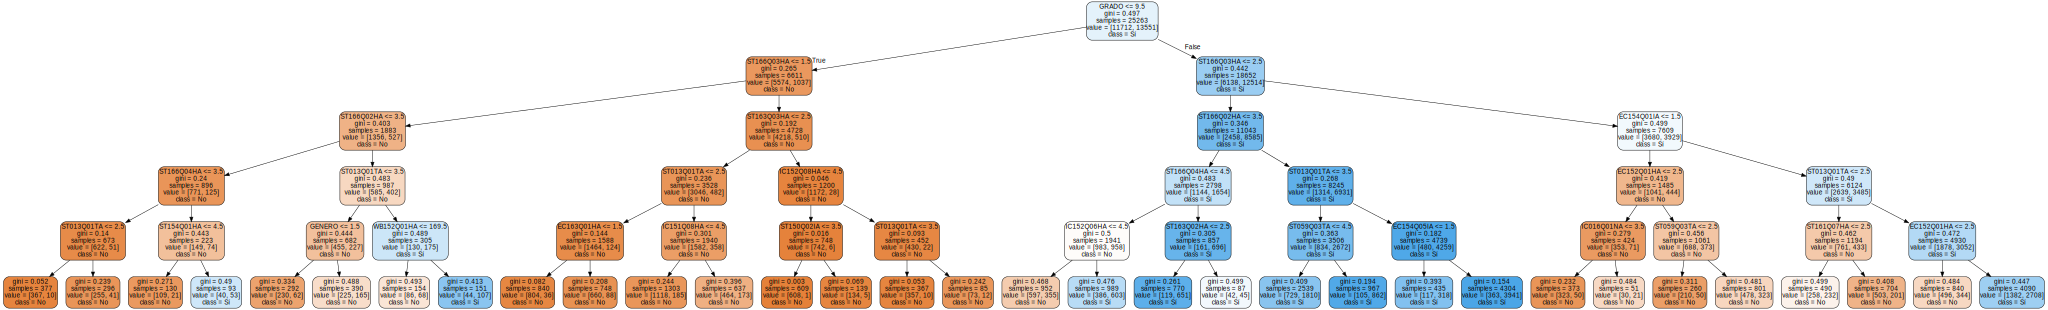

In [ ]:
plot_tree(best_model, df.drop(['TARGET'], axis=1).columns, ['No', 'Sí'], 'Árbol de Decisión')

In [ ]:
# despues de graficar nuestro arbol de desicion vamos a extraer las 20 variables mas importantes y sus valores
# eso lo guardaremos en un DF llamado df_importancia

df_importancia = pd.DataFrame({'feature': df.drop(['TARGET'], axis=1).columns, 'importance': best_model.feature_importances_})
df_importancia = df_importancia.sort_values('importance', ascending=False).reset_index(drop=True)
df_importancia.head(20)


,feature,importance
0,GRADO,0.566532
1,ST166Q03HA,0.152345
2,ST166Q02HA,0.071909
3,ST013Q01TA,0.055299
4,EC154Q01IA,0.038293
5,ST166Q04HA,0.031325
6,EC152Q01HA,0.024037
7,ST059Q03TA,0.013641
8,IC152Q06HA,0.011948
9,EC154Q05IA,0.005915


In [ ]:
nombre_columnas = {
# Tarea de Lectura: Has recibido un mensaje en tu bandeja de entrada de un conocido operador de telefonía móvil que te informa que
#eres uno de los ganadores de un teléfono inteligente. El remitente te pide que hagas clic en el enlace para completar un formulario con tus datos
#para que puedan enviarte el teléfono inteligente. En tu opinión, ¿qué tan apropiadas son las siguientes estrategias en respuesta a este correo electrónico?
#1: not appropiate at all, 2, 3, 4, 5, 6: Very appropriate
'ST166Q02HA': 'Verifica la dirección de correo electrónico del remitente',
'ST166Q03HA': 'Haz clic en el enlace para completar el formulario lo antes posible',
'ST166Q04HA': 'Eliminar el correo electrónico sin hacer clic en el enlace',
'ST166Q05HA': 'Consultar el sitio web del operador de telefonía móvil para verificar si se menciona la oferta del teléfono inteligente',

# ¿Cuántos períodos de clase a la semana se te suele requerir asistir para las siguientes materias?
#(Por favor, ingresa un número en cada fila. Ingresa "0" (cero) si no tienes ninguno.)
'ST059Q03TA': 'Número de períodos de clase a la semana en <ciencias>',

#En la prueba PISA que tomaste antes del receso, tuviste que leer varios textos y responder preguntas de comprensión lectora.
#¿Cómo te sientes acerca de estas tareas de lectura?
#1: En desacuerdo total, 2: En desacuerdo, 3: De acuerdo, 4: Totalmente de acuerdo
'ST163Q02HA': 'Había muchas palabras que no podía entender',
'ST163Q03HA': 'Muchos textos eran demasiado difíciles para mí',

# ¿Cuánto estás de acuerdo con las siguientes afirmaciones?
# 1: En desacuerdo total, 2: En desacuerdo, 3: De acuerdo, 4: Totalmente de acuerdo
'ST161Q02HA': 'Puedo entender textos difíciles',
'ST161Q03HA': 'Leo con fluidez',
'ST161Q07HA': 'Necesito leer un texto varias veces antes de entenderlo completamente',

#Tarea de lectura: Acabas de leer un texto largo y bastante difícil de dos páginas sobre las fluctuaciones en el nivel del agua de un lago en África.
#Debes escribir un resumen.
#¿Cómo calificas la utilidad de las siguientes estrategias para escribir un resumen de este texto de dos páginas?
#Las respuestas van del 1 al 5. Comenzando con 1: Nada útil y llegando a 5: Muy útil.
'ST165Q04IA': 'Verifico cuidadosamente si los datos más importantes del texto están representados en el resumen',
'ST165Q02IA': 'Intento copiar con precisión tantas frases como sea posible',


#¿Cómo calificas la utilidad de las siguientes estrategias para escribir un resumen de este texto de dos páginas?
#Las respuestas van del 1 al 5. Comenzando con 1: Nada útil y llegando a 5: Muy útil.
'ST165Q04IA': 'Compruebo cuidadosamente si los datos más importantes del texto están representados en el resumen',
'ST165Q02IA': 'Intento copiar con precisión tantas frases como sea posible',

#Durante <este año académico>, ¿cuántas páginas tenía el texto más largo que tuviste que leer en tus <clases de idioma para el examen>?
'ST154Q01HA': 'Una página o menos',

#¿Asistes actualmente a clases adicionales? Estas son solo lecciones en materias que también estás aprendiendo en la escuela,
#y en las que dedicas tiempo extra fuera del horario escolar normal. Las lecciones pueden impartirse en tu escuela, en tu hogar o en otro lugar.
#1: Sí 2: No
'EC154Q01IA': 'Clases de <enriquecimiento> en <idioma del examen>',
'EC154Q05IA': 'Clases de <remediación> en <idioma del examen>',


#¿Qué crees que estarás haciendo dentro de 5 años?
'EC152Q01HA': 'Estaré trabajando porque la ocupación que deseo no requiere un título de estudio (por ejemplo, diploma o grado universitario)',

#¿En el último mes, se ha utilizado un dispositivo digital para el aprendizaje o la enseñanza durante las lecciones en las siguientes materias?
#1: Sí, tanto el profesor como los estudiantes lo usaron, 2: Sí, pero solo los estudiantes lo usaron, 3: Sí, pero solo el profesor lo usó
#4: No, 5: No estudio esta materia
'IC152Q08HA': '<Artes escénicas>',
'IC152Q06HA':'Músisa',

#En una semana escolar típica, ¿cuánto tiempo pasas utilizando dispositivos digitales fuera
#de las lecciones en el aula (ya sea en casa o en la escuela) para las siguientes materias?
#1:Sin tiempo 2:1-30 min, 3:31-60 min, 4: mas de 60 min, 5: No estudio esta materia

'IC151Q08HA':'Artes escénicas',
#Pensando en tu experiencia con los medios digitales y los dispositivos digitales:
#¿hasta qué punto estás en desacuerdo o de acuerdo con las siguientes afirmaciones?
#1:Muy desacuerdo, 2:desacuerdo, 3: deacuerdo, 4: muy deacuerdo
'IC016Q01NA': 'Para aprender algo nuevo sobre dispositivos digitales, me gusta hablar de ellos con mis amigos.',

#¿Por qué asistes a clases adicionales en <idioma del examen> este año escolar?
#0: No marcado, 1: Marcado
'EC012Q02NA': 'Quiero prepararme para los exámenes',

#¿Por qué estudiaste antes o después de la escuela?
#1: Sí y 2: No
'EC163Q05HA': 'Todos mis compañeros de clase estudian antes o después de la escuela',
'EC163Q01HA': 'Me interesa el contenido',
# 1:0-10 libros, 2: 11-25 libros, 3: 26-100 libros, 4: 101-200 libros, 5: 201-500libros, 6:mas de 500 libros
'ST013Q01TA': 'Cuantos libros hay en tu casa?',

'WB152Q01HA': 'Altura (cm)',
#A: 0 días / B: 1 día / C: 2 días / D: 3 días / E: 4 días / F: 5 días / G: 6 días
'WB158Q01HA': '¿Cuántos días a la semana sueles pasar tiempo con tus amigos justo después de la escuela?',

#¿Qué tan fácil te resulta hablar con las siguientes personas sobre las cosas que realmente te molestan?
#1: Muy difícil 2: Difícil 3: Fácil 4: Muy fácil 5: No tengo o no veo a esta persona
'WB162Q09HA': 'Otros miembros de la familia',
        }

In [ ]:
# Reemplazar los valores en la columna 'feature' de df_importancia
df_importancia['feature'] = df_importancia['feature'].replace(nombre_columnas)

In [ ]:
df_importancia.head(3)

,feature,importance
0,GRADO,0.566532
1,Haz clic en el enlace para completar el formul...,0.152345
2,Verifica la dirección de correo electrónico de...,0.071909


In [ ]:
# convertimos la columna importance a porcentaje

df_importancia['importance'] = df_importancia['importance'] * 100
df_importancia.head(20)

,feature,importance
0,GRADO,56.653164
1,Haz clic en el enlace para completar el formul...,15.234509
2,Verifica la dirección de correo electrónico de...,7.190877
3,Cuantos libros hay en tu casa?,5.529895
4,Clases de <enriquecimiento> en <idioma del exa...,3.829268
5,Eliminar el correo electrónico sin hacer clic ...,3.132524
6,Estaré trabajando porque la ocupación que dese...,2.403697
7,Número de períodos de clase a la semana en <ci...,1.364060
8,Músisa,1.194779
9,Clases de <remediación> en <idioma del examen>,0.591488


In [ ]:
# hacemos un nuevo df con las 20 variables mas importantes y la columna TARGET
df2 = df_importancia.head(20)

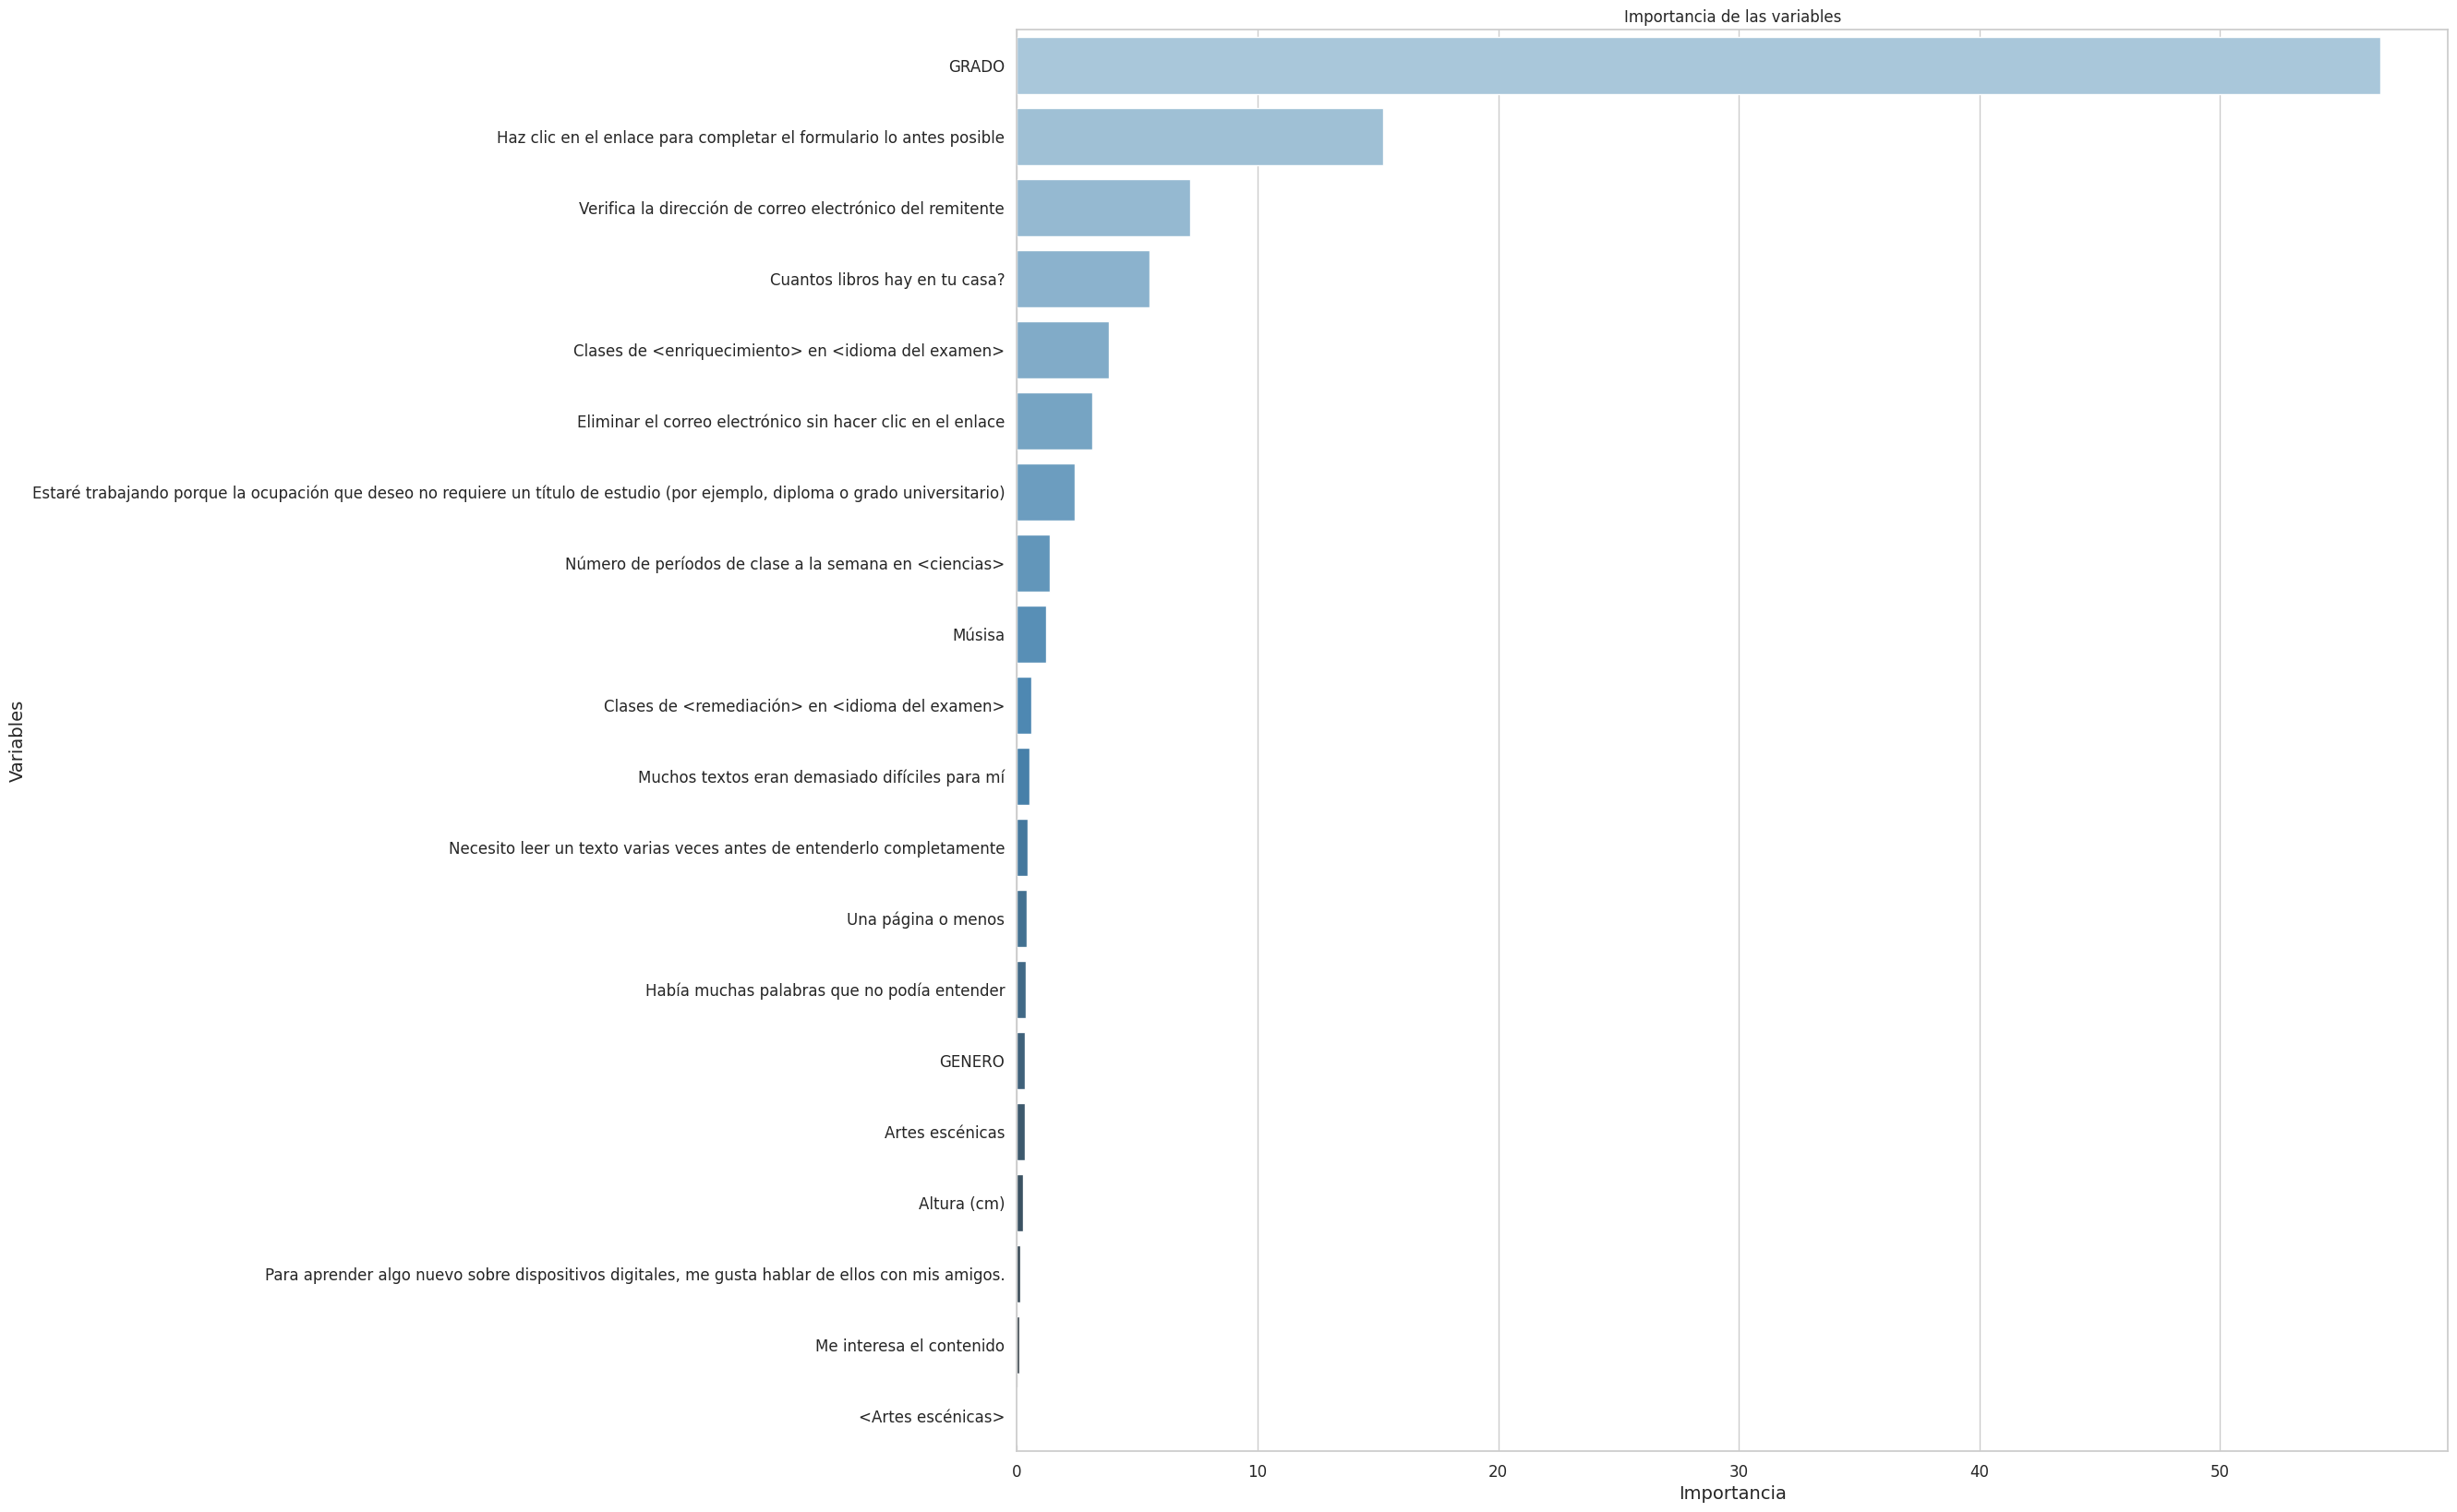

In [ ]:
# hacemos el grafico de df_importancia con Seaborn con letra Arial 12 para los titulos y letra Arial 10 para el resto de texto
# el eje X sera importance y el eje Y sera feature
# el texto de de la columna feature debe ir en dos lineas para que el grafico quede centrado

plt.figure(figsize=(20,20))
sns.barplot(x='importance', y='feature', data=df2, palette='Blues_d')
plt.title('Importancia de las variables', fontsize=12)
plt.xlabel('Importancia', fontsize=14)
plt.ylabel('Variables', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
# vamos a calcular la curva ROC y el AUC para ver que tan bueno es nuestro modelo

# vamos a hacer una funcion que nos permita calcular la curva ROC y el AUC

def curva_roc_auc(df, TARGET):
    X = df.drop([TARGET], axis=1)
    y = df[TARGET]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

    # Definir los hiperparámetros que deseas ajustar
    param_grid = {
        'max_depth': [None, 5,5,5],
        'min_samples_leaf': [5,5,5],
        'min_samples_split': [5,5,5],
        'max_features': ['auto', 'sqrt', 'log2', None]
    }

    # Crear el modelo de árbol de decisión
    clf = DecisionTreeClassifier()

    # Usar GridSearchCV para encontrar la mejor combinación de hiperparámetros
    grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Obtener el mejor modelo y predecir en el conjunto de prueba
    best_clf = grid_search.best_estimator_
    y_pred = best_clf.predict(X_test)

    # Calcular y mostrar la precisión y la matriz de confusión
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    print("Mejor combinación de hiperparámetros:", grid_search.best_params_)
    print("Accuracy:", accuracy)
    print("Matriz de Confusión:")
    print(confusion)

    # Calcular la probabilidad de que la predicción sea 1
    y_pred_proba = best_clf.predict_proba(X_test)[:,1]

    # Calcular el AUC
    auc = roc_auc_score(y_test, y_pred_proba)

    # Calcular la curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

    # Graficar la curva ROC
    plt.plot(fpr, tpr, label='AUC (área = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('Tasa de Falsos Positivos o (1 - Especificidad)')
    plt.ylabel('Tasa de Verdaderos Positivos o (Sensibilidad)')
    plt.title('Curva ROC')
    plt.legend(loc="lower right")
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

Mejor combinación de hiperparámetros: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 5}
Accuracy: 0.7534832172260925
Matriz de Confusión:
[[2060  913]
 [ 644 2699]]


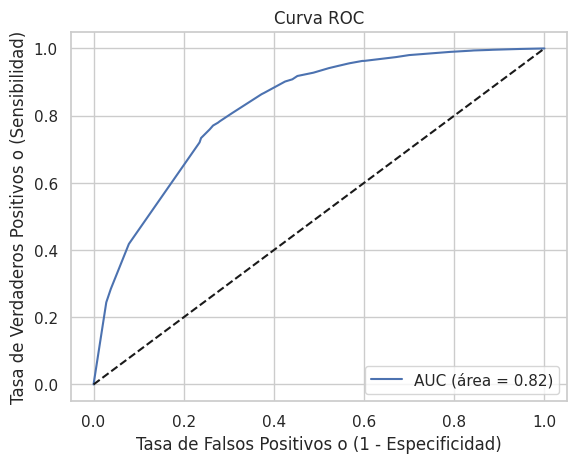

In [ ]:
curva_roc_auc(df, 'TARGET')